Rainfall Weather Forecasting
Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.
 
Dataset Description:
Number of columns: 23
 
Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('/Users/sneha/Downloads/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [ ]:
## lets see what percentage of null values are there in the data

In [5]:
null_percentage = df.isnull().sum()/df.shape[0]
null_percentage

Date             0.000000
Location         0.000000
MinTemp          0.008902
MaxTemp          0.007122
Rainfall         0.028487
Evaporation      0.416855
Sunshine         0.474065
WindGustDir      0.117626
WindGustSpeed    0.117626
WindDir9am       0.098398
WindDir3pm       0.036558
WindSpeed9am     0.009021
WindSpeed3pm     0.012700
Humidity9am      0.007003
Humidity3pm      0.012107
Pressure9am      0.155371
Pressure3pm      0.155727
Cloud9am         0.287359
Cloud3pm         0.291395
Temp9am          0.006647
Temp3pm          0.011395
RainToday        0.028487
RainTomorrow     0.028368
dtype: float64

In [ ]:
## removing the columns with more than 40% of null values

In [6]:
valid_cols = df.columns[null_percentage<0.4]
valid_cols

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

## From here we can handle the null values with 2 diffrent startegies : 
1. By removing all the data with null values.
2. By removing the higher percentange columns and then removing the null value data. 

In [7]:
df = df[valid_cols].copy()

In [8]:
df = df.dropna()

In [9]:
## Convert the date into datetime :

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

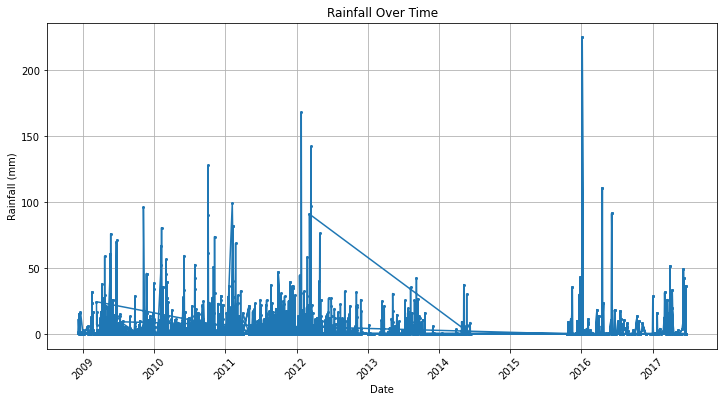

In [10]:
# Create a time series plot of rainfall
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Rainfall'], linestyle='-', marker='o', markersize=2)
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Year
2008    3.771429
2009    4.064090
2010    2.993957
2011    2.906750
2012    2.640566
2013    2.139506
2014    0.909877
2015    3.853061
2016    5.470833
2017    7.566234
Name: Rainfall, dtype: float64


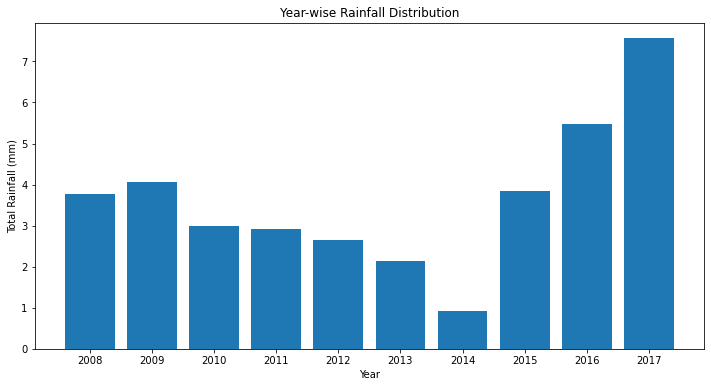

In [11]:
# Group and sum rainfall by year
yearly_rainfall = df.groupby('Year')['Rainfall'].mean()
print(yearly_rainfall)
# Plot year-wise rainfall distribution
plt.figure(figsize=(12, 6))
plt.bar(yearly_rainfall.index, yearly_rainfall.values)
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Year-wise Rainfall Distribution')
plt.xticks(yearly_rainfall.index)
plt.show()


Month
1     3.550754
2     4.223864
3     3.910970
4     3.790556
5     2.672300
6     4.329496
7     2.438889
8     2.307612
9     2.499371
10    2.897143
11    3.267251
12    2.865940
Name: Rainfall, dtype: float64


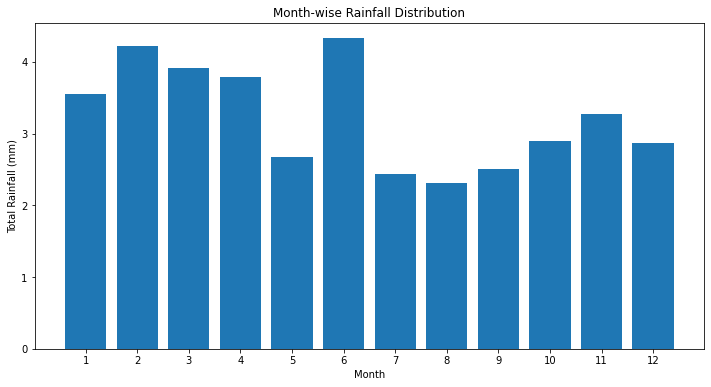

In [12]:

# Group and sum rainfall by month
monthly_rainfall = df.groupby('Month')['Rainfall'].mean()
print(monthly_rainfall)
# Plot month-wise rainfall distribution
plt.figure(figsize=(12, 6))
plt.bar(monthly_rainfall.index, monthly_rainfall.values)
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Month-wise Rainfall Distribution')
plt.xticks(monthly_rainfall.index)
plt.show()


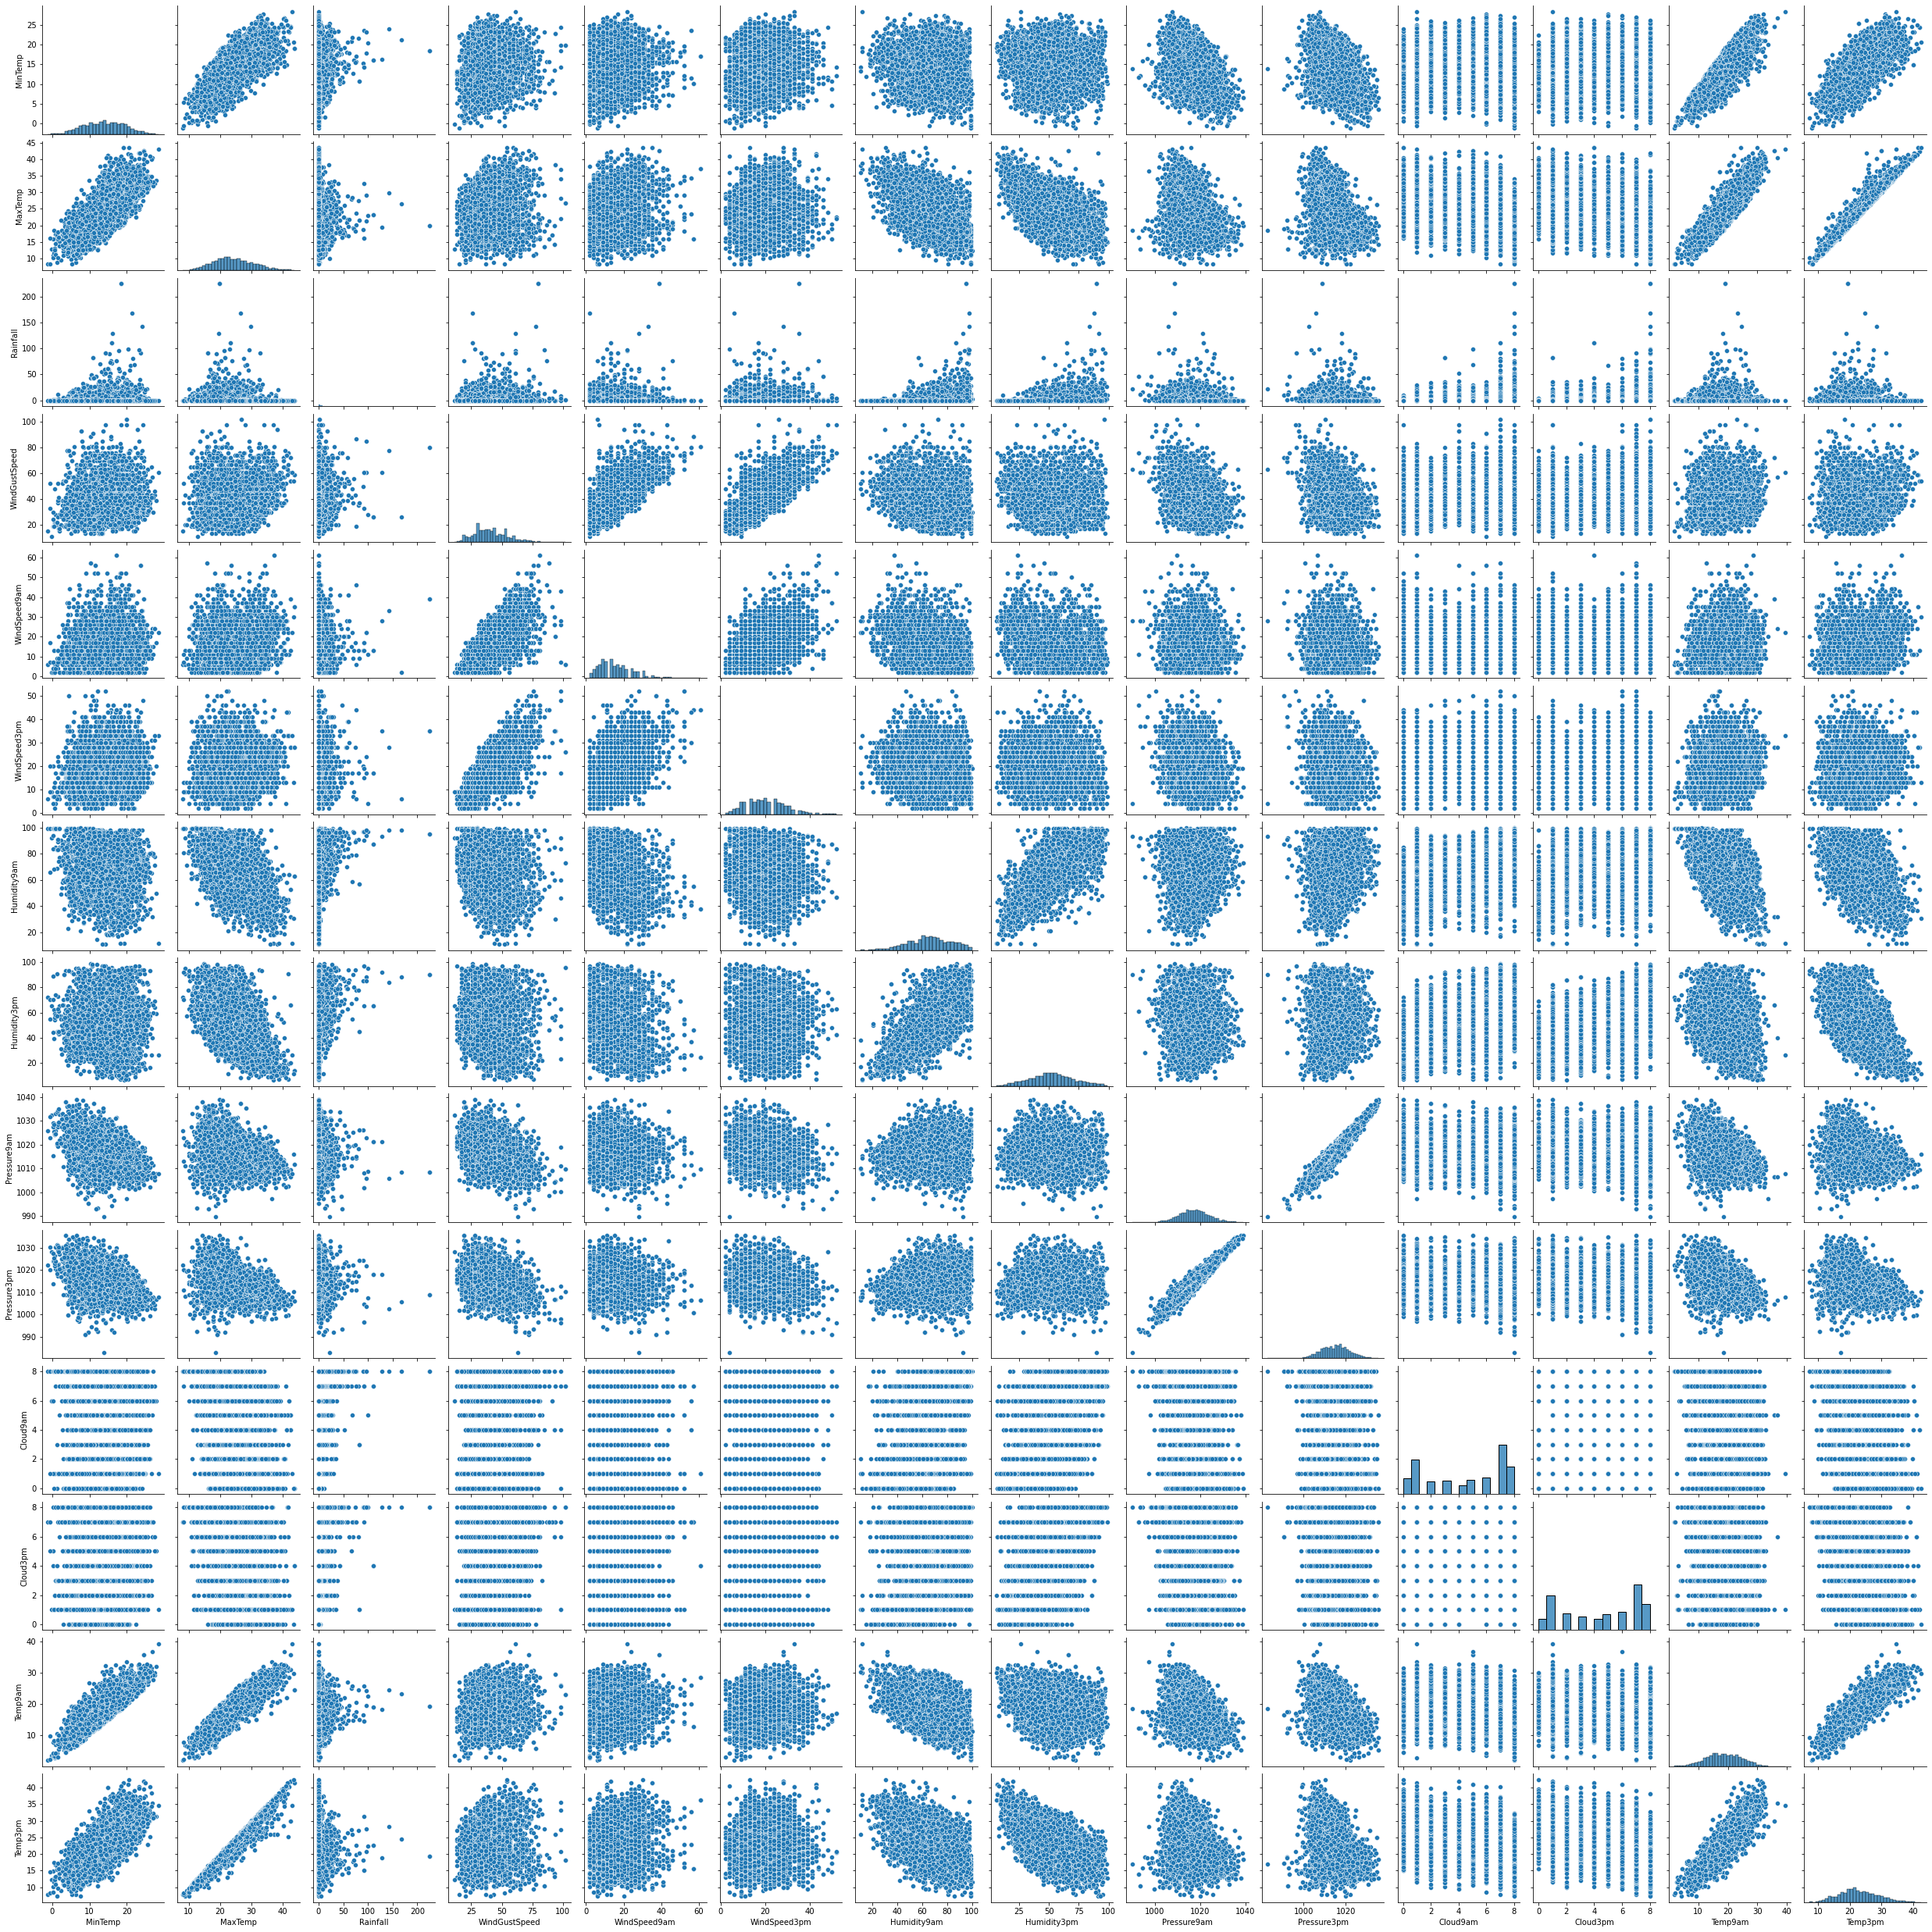

In [13]:
# Select the numerical columns for the pair plot
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                     'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Create a pair plot
sns.pairplot(df, vars=numerical_columns, kind='scatter')
plt.show()


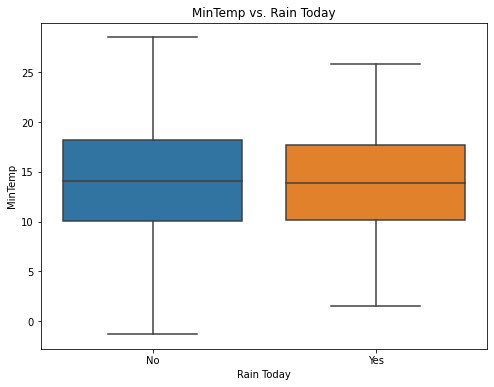

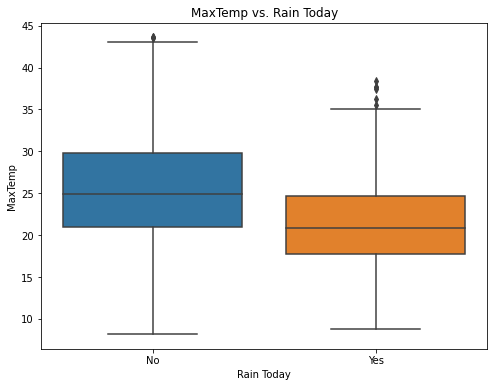

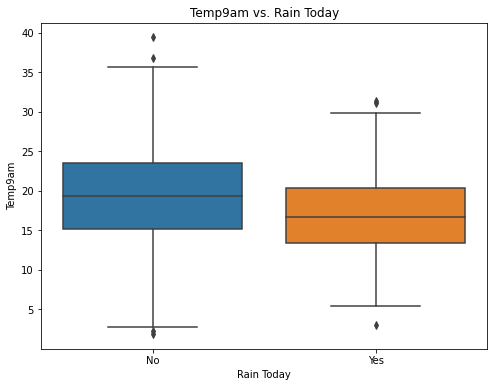

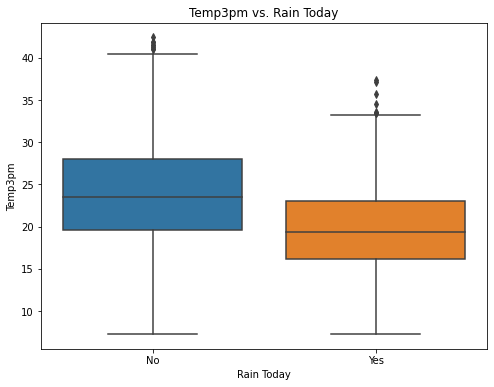

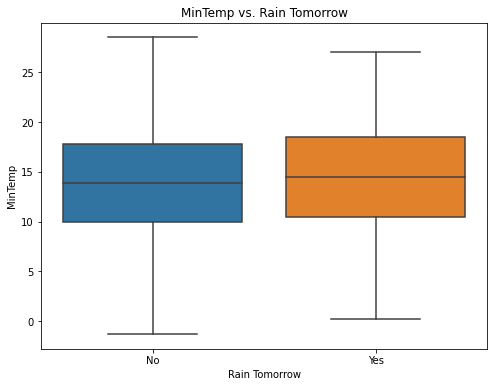

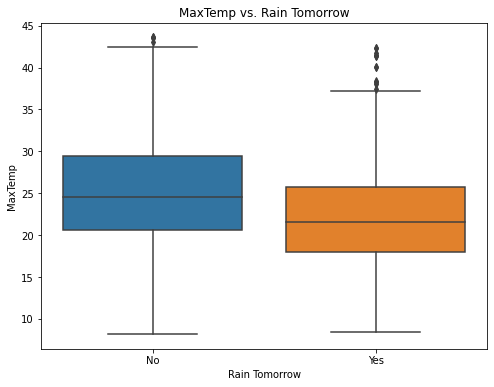

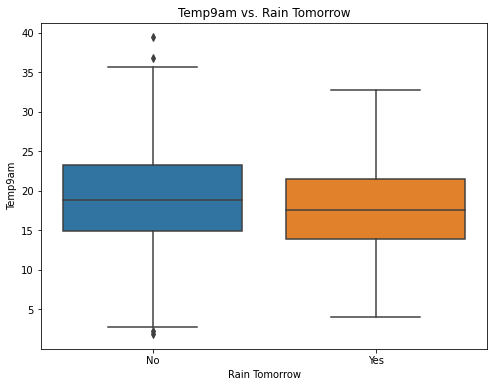

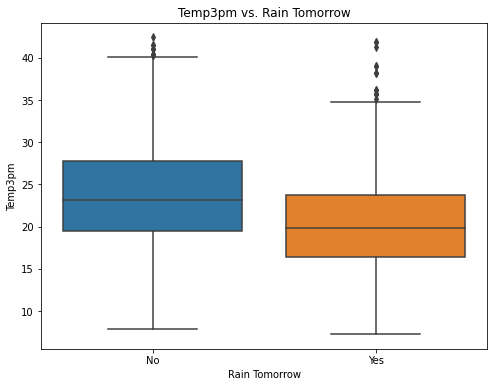

In [14]:

# List of temperature columns
temperature_columns = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

# Create box plots for temperature columns against "RainToday"
for col in temperature_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainToday', y=col, data=df)
    plt.xlabel('Rain Today')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Today')
    plt.show()

    
# Create box plots for temperature columns against "RainToday"
for col in temperature_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainTomorrow', y=col, data=df)
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Tomorrow')
    plt.show()

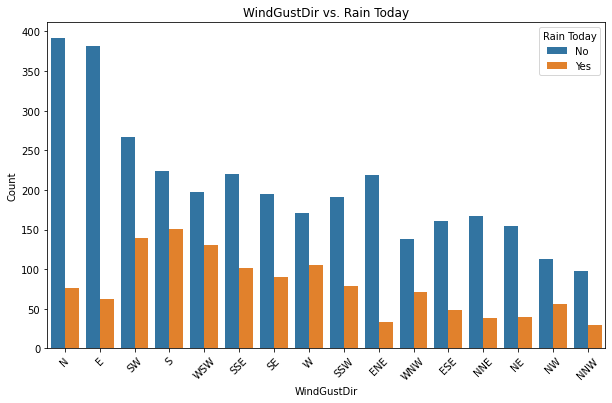

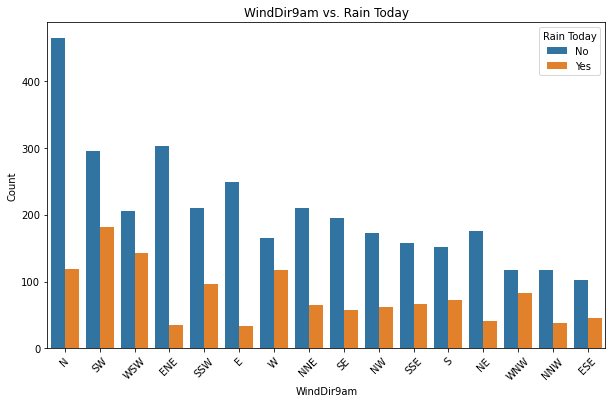

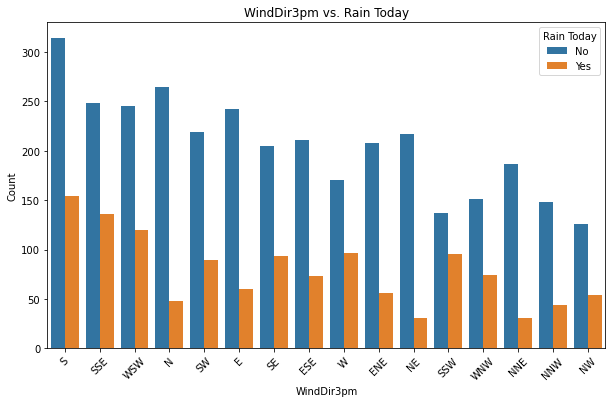

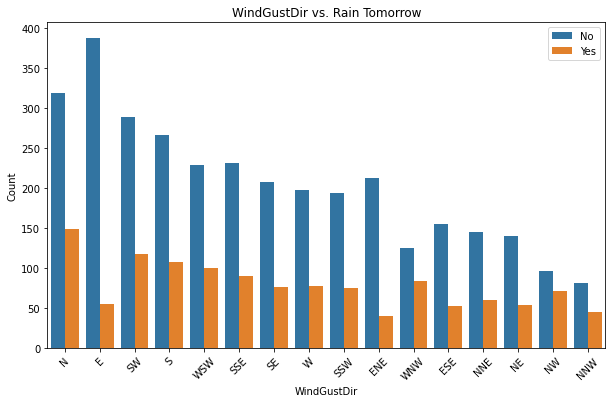

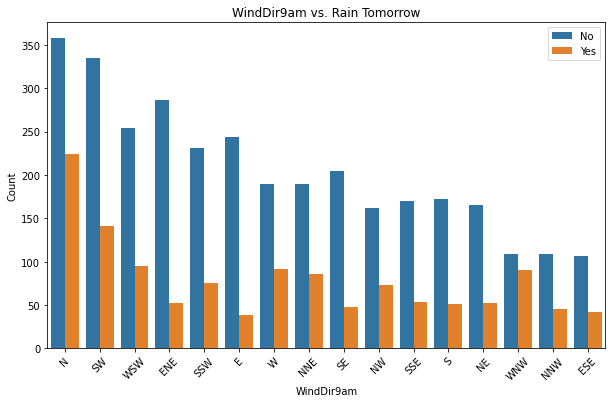

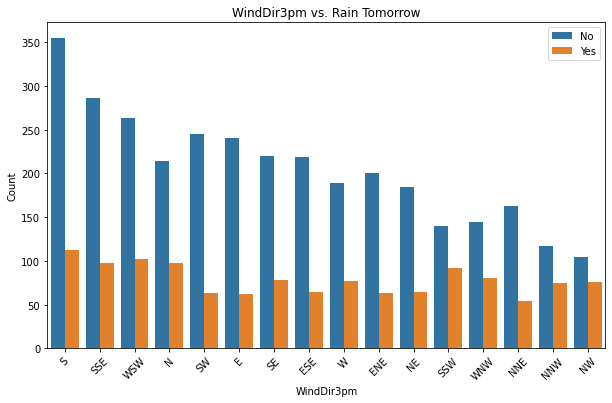

In [15]:

# List of wind direction columns
wind_direction_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Create bar plots for wind direction columns against "RainToday"
for col in wind_direction_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='RainToday', data=df, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} vs. Rain Today')
    plt.xticks(rotation=45)
    plt.legend(title='Rain Today', labels=['No', 'Yes'])
    plt.show()


# Create bar plots for wind direction columns against "RainToday"
for col in wind_direction_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='RainTomorrow', data=df, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} vs. Rain Tomorrow')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


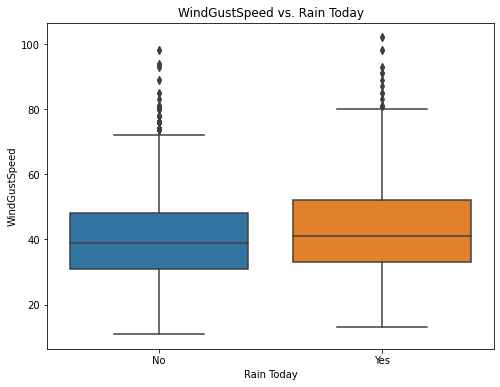

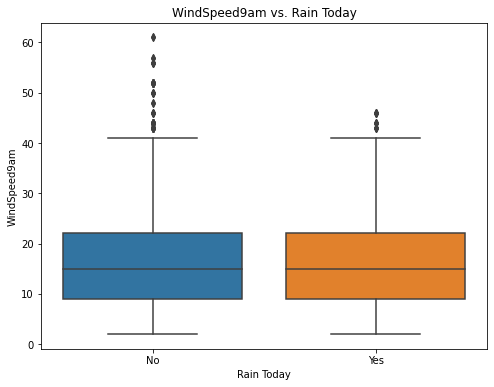

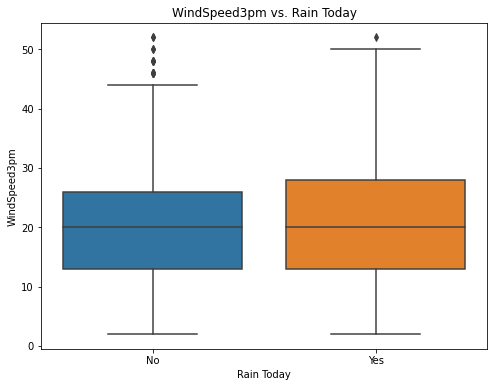

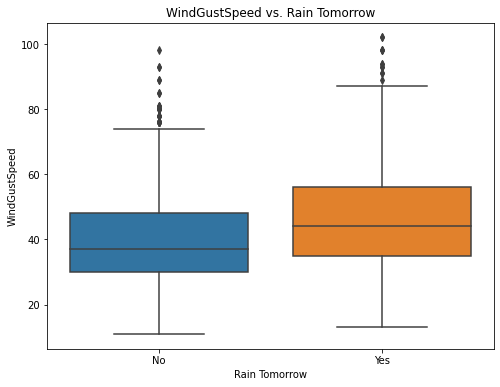

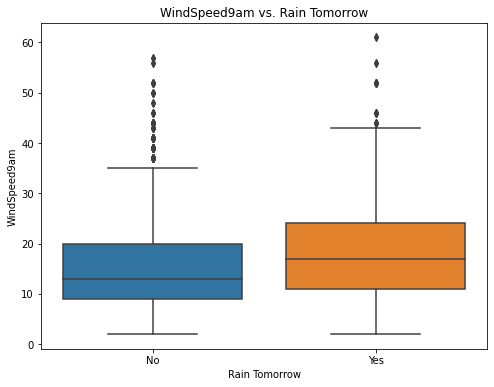

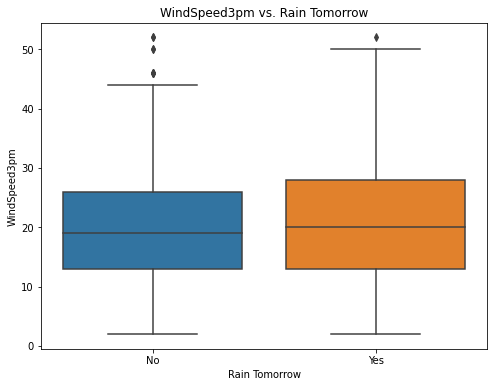

In [16]:
# List of wind speed columns
wind_speed_columns = ['WindGustSpeed','WindSpeed9am', 'WindSpeed3pm']

# Create box plots for wind speed columns against "RainToday"
for col in wind_speed_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainToday', y=col, data=df)
    plt.xlabel('Rain Today')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Today')
    plt.show()

# Create box plots for wind speed columns against "RainToday"
for col in wind_speed_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainTomorrow', y=col, data=df)
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Tomorrow')
    plt.show()


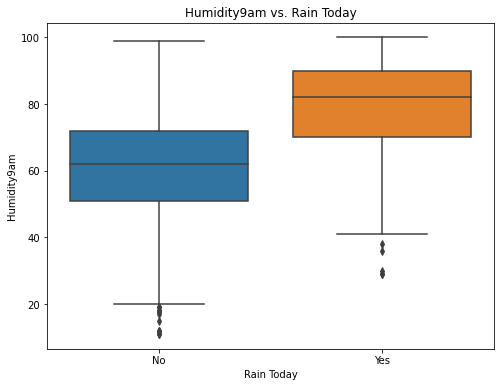

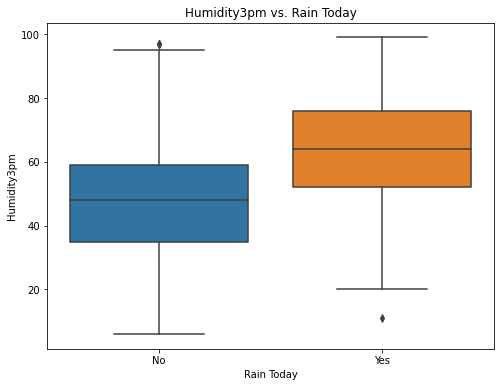

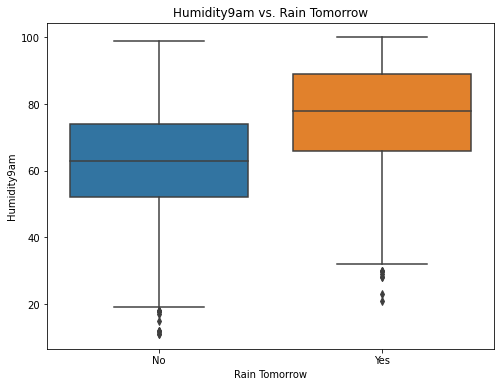

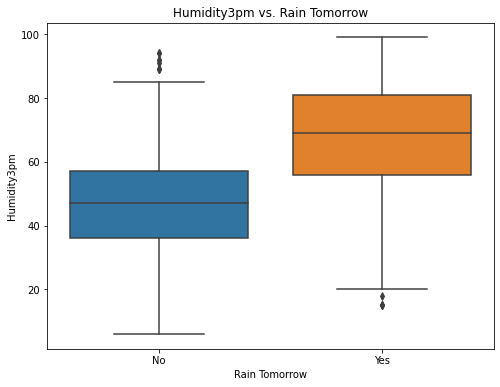

In [17]:

# List of humidity columns
humidity_columns = ['Humidity9am', 'Humidity3pm']

# Create box plots for humidity columns against "RainToday"
for col in humidity_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainToday', y=col, data=df)
    plt.xlabel('Rain Today')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Today')
    plt.show()

    
    # Create box plots for humidity columns against "RainToday"
for col in humidity_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainTomorrow', y=col, data=df)
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Tomorrow')
    plt.show()

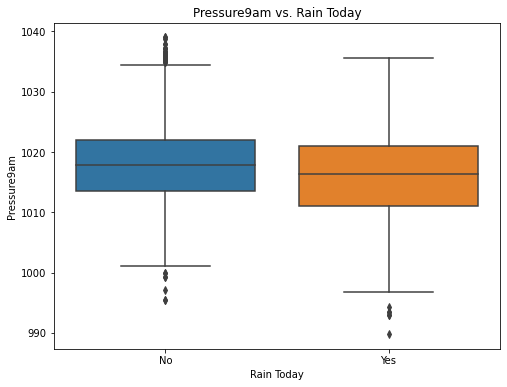

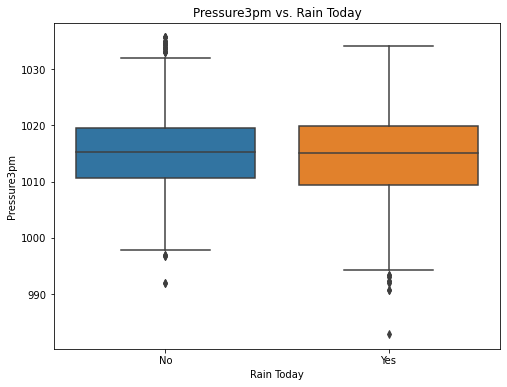

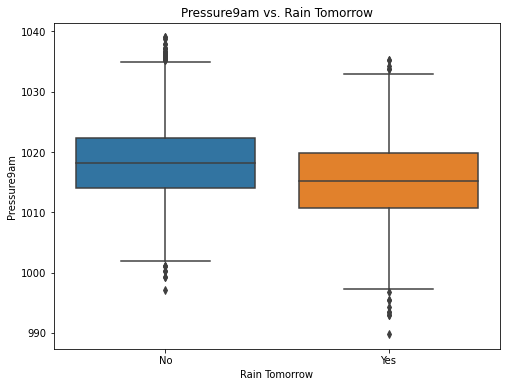

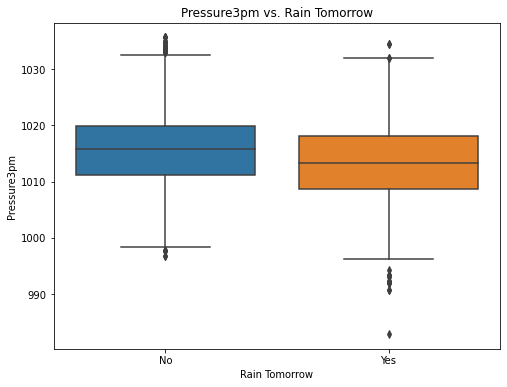

In [18]:
# List of Pressure columns
Pressure_columns = ['Pressure9am', 'Pressure3pm']

# Create box plots for Pressure columns against "RainToday"
for col in Pressure_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainToday', y=col, data=df)
    plt.xlabel('Rain Today')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Today')
    plt.show()

    
    # Create box plots for Pressure columns against "RainToday"
for col in Pressure_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainTomorrow', y=col, data=df)
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Tomorrow')
    plt.show()

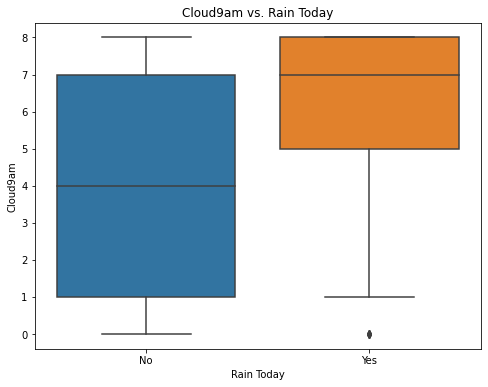

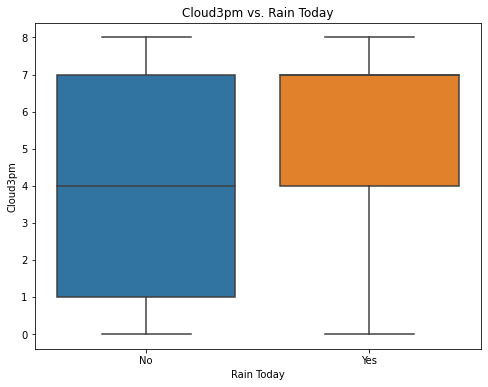

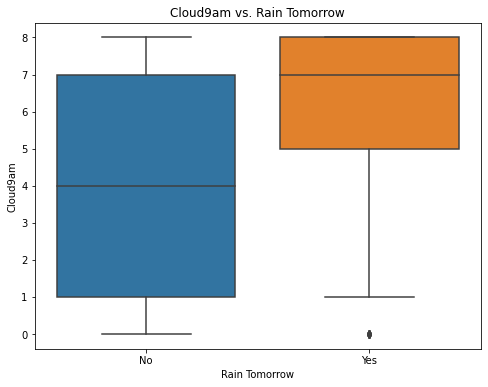

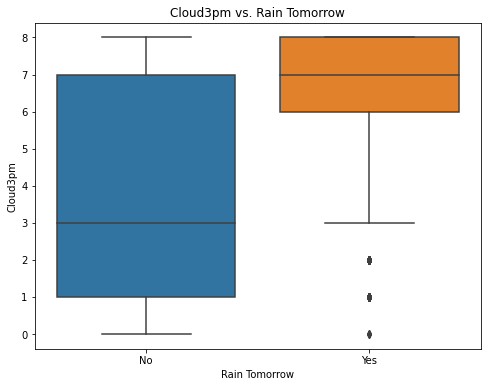

In [19]:
# List of Cloud columns
Cloud_columns = ['Cloud9am', 'Cloud3pm']

# Create box plots for Pressure columns against "RainToday"
for col in Cloud_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainToday', y=col, data=df)
    plt.xlabel('Rain Today')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Today')
    plt.show()

    
    # Create box plots for Pressure columns against "RainToday"
for col in Cloud_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainTomorrow', y=col, data=df)
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(col)
    plt.title(f'{col} vs. Rain Tomorrow')
    plt.show()

In [24]:
df = df.drop(columns=['Date'])

In [ ]:
## Removing the columns Cloud9am and Cloud3pm and then removing the null values, giving us more data. 

In [28]:
df2 = pd.read_csv('/Users/sneha/Downloads/weatherAUS.csv')

In [29]:
df2 = df2.drop(columns=['Cloud9am','Cloud3pm','Evaporation','Sunshine'])

In [31]:
df2 = df2.dropna()

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6332 entries, 0 to 8423
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6332 non-null   object 
 1   Location       6332 non-null   object 
 2   MinTemp        6332 non-null   float64
 3   MaxTemp        6332 non-null   float64
 4   Rainfall       6332 non-null   float64
 5   WindGustDir    6332 non-null   object 
 6   WindGustSpeed  6332 non-null   float64
 7   WindDir9am     6332 non-null   object 
 8   WindDir3pm     6332 non-null   object 
 9   WindSpeed9am   6332 non-null   float64
 10  WindSpeed3pm   6332 non-null   float64
 11  Humidity9am    6332 non-null   float64
 12  Humidity3pm    6332 non-null   float64
 13  Pressure9am    6332 non-null   float64
 14  Pressure3pm    6332 non-null   float64
 15  Temp9am        6332 non-null   float64
 16  Temp3pm        6332 non-null   float64
 17  RainToday      6332 non-null   object 
 18  RainTomo

In [34]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month

df2 = df2.drop(columns=['Date'])

In [ ]:
# Label encode the categorical columns

In [35]:
categorical_columns = df.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Label encode each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [36]:
categorical_columns = df2.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Label encode each categorical column
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column])


In [ ]:
# Remove the outliers from both dataframes

In [37]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(df)

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

df.iloc[outlier_indices]

# Get indices of non-outliers
non_outlier_indices = [i for i, pred in enumerate(outliers) if pred == 1]

# Filter the DataFrame to keep only non-outliers
df = df.iloc[non_outlier_indices]

In [38]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(df2)

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

df2.iloc[outlier_indices]


# Get indices of non-outliers
non_outlier_indices = [i for i, pred in enumerate(outliers) if pred == 1]

# Filter the DataFrame to keep only non-outliers
df2 = df2.iloc[non_outlier_indices]

In [ ]:
## Correlation matrix and heat map

In [39]:
df.corr()

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  \
Location       1.000000  0.016061  0.017317  0.023884     0.030938   
MinTemp        0.016061  1.000000  0.718085  0.049035    -0.196486   
MaxTemp        0.017317  0.718085  1.000000 -0.152047    -0.328810   
Rainfall       0.023884  0.049035 -0.152047  1.000000     0.155368   
WindGustDir    0.030938 -0.196486 -0.328810  0.155368     1.000000   
WindGustSpeed  0.300797  0.124899  0.092079  0.043966    -0.066008   
WindDir9am    -0.191388 -0.083469 -0.284717  0.165376     0.453422   
WindDir3pm     0.104663 -0.177900 -0.220685  0.100809     0.570138   
WindSpeed9am   0.287983  0.072614  0.036727  0.011270    -0.121073   
WindSpeed3pm   0.309238  0.108310  0.045593  0.018286     0.055431   
Humidity9am    0.047021 -0.049357 -0.402717  0.311030     0.170502   
Humidity3pm   -0.008313  0.069143 -0.431078  0.246960     0.201654   
Pressure9am    0.031557 -0.438281 -0.337412 -0.064068    -0.102139   
Pressure3pm    0.071199 -0.437544 -0.440593  0.001025     0.006448   
Cloud9am       0.123924  0.113827 -0.339042  0.215413     0.170572   
Cloud3pm       0.094110  0.026759 -0.340636  0.173687     0.135259   
Temp9am       -0.025842  0.854738  0.879738 -0.081762    -0.238786   
Temp3pm        0.017728  0.697057  0.981510 -0.151944    -0.344863   
RainToday      0.021345 -0.019284 -0.302479  0.595211     0.223199   
RainTomorrow   0.030033  0.033413 -0.222127  0.229213     0.099667   
Year           0.524449  0.139452  0.209713  0.003440    -0.012685   
Month         -0.065869 -0.260592 -0.188323  0.032406     0.057919   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
Location            0.300797   -0.191388    0.104663      0.287983   
MinTemp             0.124899   -0.083469   -0.177900      0.072614   
MaxTemp             0.092079   -0.284717   -0.220685      0.036727   
Rainfall            0.043966    0.165376    0.100809      0.011270   
WindGustDir        -0.066008    0.453422    0.570138     -0.121073   
WindGustSpeed       1.000000   -0.238891    0.030723      0.665305   
WindDir9am         -0.238891    1.000000    0.265732     -0.221347   
WindDir3pm          0.030723    0.265732    1.000000     -0.012664   
WindSpeed9am        0.665305   -0.221347   -0.012664      1.000000   
WindSpeed3pm        0.693927   -0.114459    0.079837      0.500284   
Humidity9am        -0.213329    0.187173    0.059890     -0.313625   
Humidity3pm        -0.127697    0.254938    0.051885     -0.175319   
Pressure9am        -0.293797    0.021710   -0.120651     -0.099464   
Pressure3pm        -0.259264    0.120523   -0.019852     -0.068989   
Cloud9am            0.042976    0.140516    0.116616     -0.002173   
Cloud3pm            0.097809    0.081239    0.078016      0.059054   
Temp9am             0.071705   -0.164519   -0.205251      0.019854   
Temp3pm             0.061030   -0.292334   -0.234094      0.028398   
RainToday           0.062260    0.228637    0.165415      0.013724   
RainTomorrow        0.195772    0.064466    0.057018      0.060606   
Year               -0.039356   -0.096939   -0.002060     -0.039817   
Month               0.032403   -0.015103    0.006048      0.027468   

               WindSpeed3pm  ...  Pressure9am  Pressure3pm  Cloud9am  \
Location           0.309238  ...     0.031557     0.071199  0.123924   
MinTemp            0.108310  ...    -0.438281    -0.437544  0.113827   
MaxTemp            0.045593  ...    -0.337412    -0.440593 -0.339042   
Rainfall           0.018286  ...    -0.064068     0.001025  0.215413   
WindGustDir        0.055431  ...    -0.102139     0.006448  0.170572   
WindGustSpeed      0.693927  ...    -0.293797    -0.259264  0.042976   
WindDir9am        -0.114459  ...     0.021710     0.120523  0.140516   
WindDir3pm         0.079837  ...    -0.120651    -0.019852  0.116616   
WindSpeed9am       0.500284  ...    -0.099464    -0.068989 -0.002173   
WindSpeed3pm       1.000000  ...    -0.212083    -0.154289  0.044412   
H

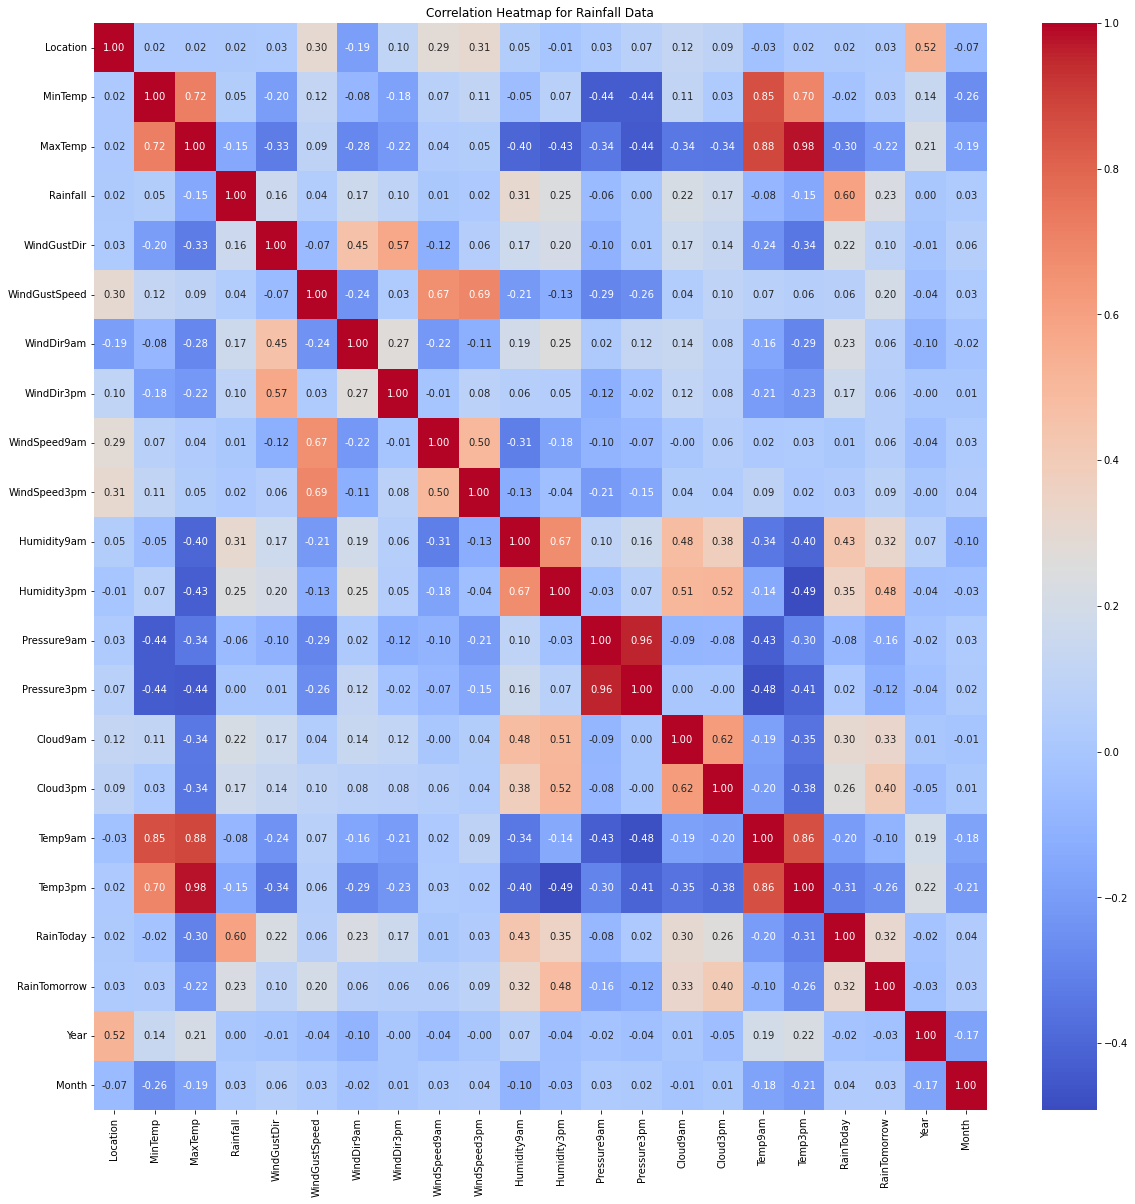

In [40]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Rainfall Data')
plt.show()

In [ ]:
# Feature Importance : 

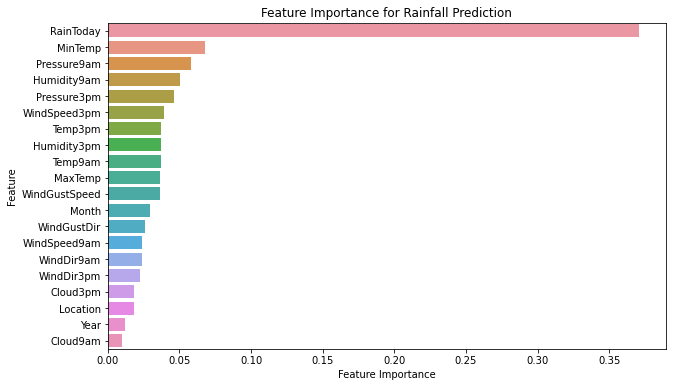

In [41]:
X = df.drop(columns=['RainTomorrow','Rainfall'])
y = df['Rainfall']

features = X.columns
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


feature_importance = regressor.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Rainfall Prediction')
plt.show()


In [ ]:
# Model 1 : Without any feature Engineering 

Model: Linear Regression
Mean Squared Error: 29.23
R-squared: 0.31
----------------------------------------


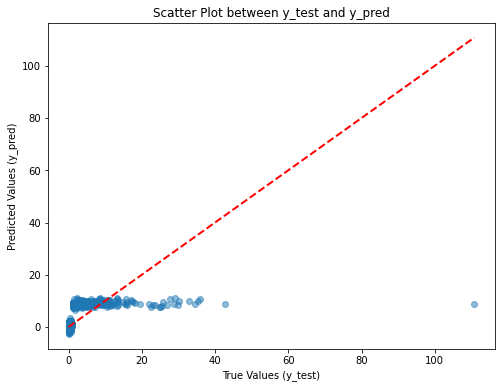

Model: Decision Tree Regressor
Mean Squared Error: 45.71
R-squared: -0.08
----------------------------------------


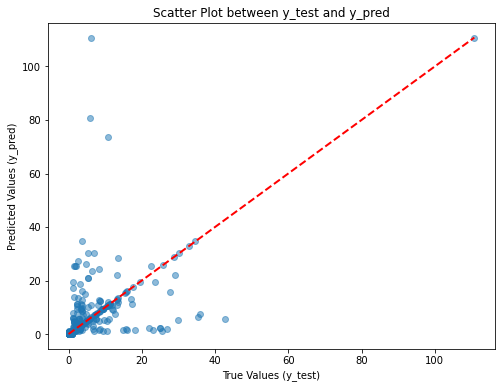

Model: Random Forest Regressor
Mean Squared Error: 15.59
R-squared: 0.63
----------------------------------------


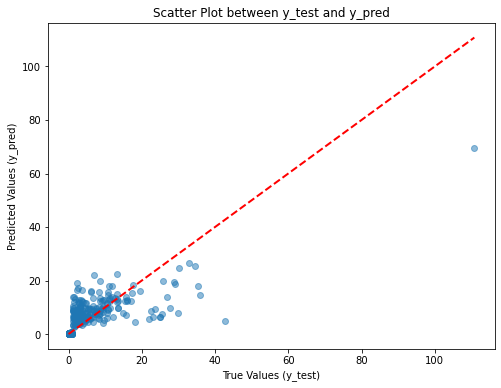

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics



X = df.drop(columns=['Rainfall'])
y = df['Rainfall']
features = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Define a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]
# Step 3: Loop through the models, train, and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Print the results
    
    print(f"Model: {model_name}")
    
    print(f"Mean Squared Error: {mse:.2f}")
    
    print(f"R-squared: {r2:.2f}")
 
    print("-" * 40)
    
    # Initialize a scatter plot
    plt.figure(figsize=(8, 6))
    
    
    # Scatter plot between y_pred and y_test
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Scatter Plot between y_test and y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()
# Show the plot



In [ ]:
# Model 2 By removing the least important features

In [61]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Year', 'Month'],
      dtype='object')

Model: Linear Regression
Mean Squared Error: 29.10
R-squared: 0.31
----------------------------------------


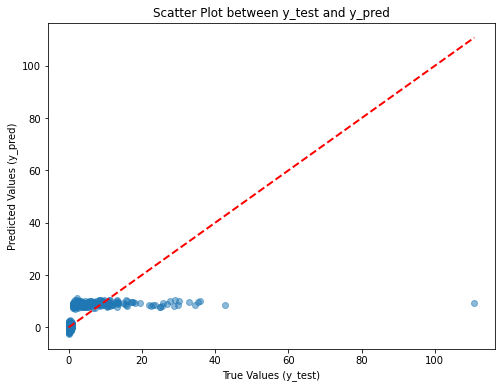

Model: Decision Tree Regressor
Mean Squared Error: 41.68
R-squared: 0.02
----------------------------------------


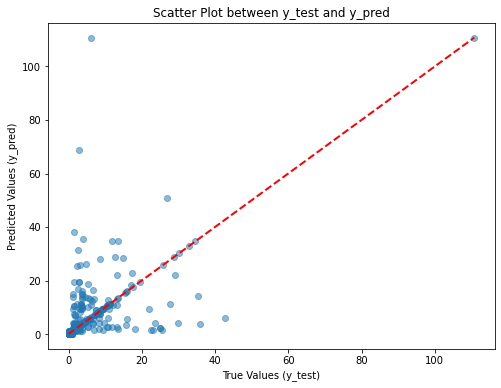

Model: Random Forest Regressor
Mean Squared Error: 15.83
R-squared: 0.63
----------------------------------------


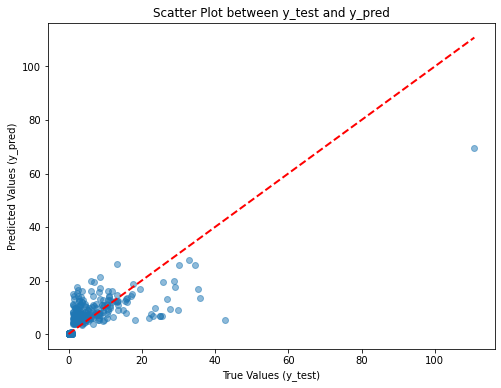

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics



X = df.drop(columns=['RainTomorrow','Rainfall','Cloud9am','Year','Cloud3pm','Location',
                    'WindDir3pm'
                    ])
y = df['Rainfall']
features = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Define a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]
# Step 3: Loop through the models, train, and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Print the results
    
    print(f"Model: {model_name}")
    
    print(f"Mean Squared Error: {mse:.2f}")
    
    print(f"R-squared: {r2:.2f}")
 
    print("-" * 40)
    
    # Initialize a scatter plot
    plt.figure(figsize=(8, 6))
    
    
    # Scatter plot between y_pred and y_test
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Scatter Plot between y_test and y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()
# Show the plot



In [113]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Calculate performance metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (Best Model):", mse_best)
print("R-squared (Best Model):", r2_best)

Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Score:  21.67799284805918
Mean Squared Error (Best Model): 15.472548769356155
R-squared (Best Model): 0.6352358806197198


In [ ]:
# Model 3 

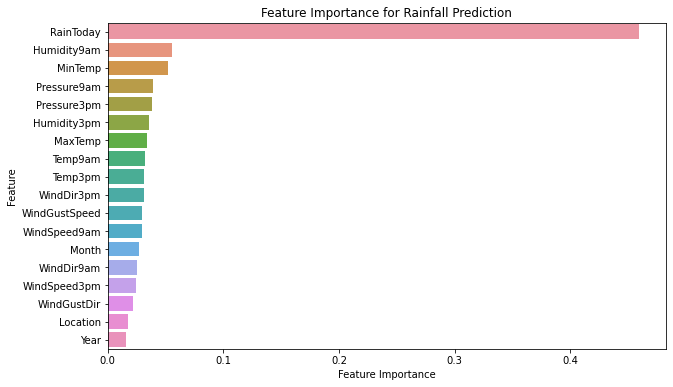

In [68]:
X = df2.drop(columns=['RainTomorrow','Rainfall'])
y = df2['Rainfall']

features = X.columns
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


feature_importance = regressor.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Rainfall Prediction')
plt.show()


Model: Linear Regression
Mean Squared Error: 11.00
R-squared: 0.44
----------------------------------------


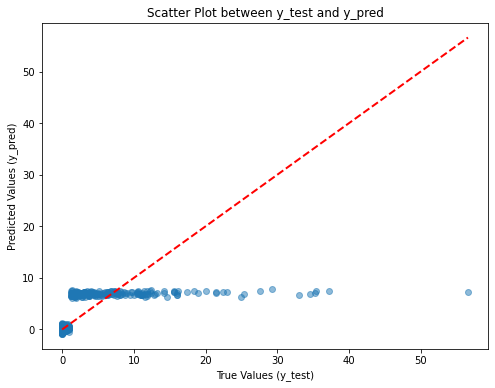

Model: Decision Tree Regressor
Mean Squared Error: 7.34
R-squared: 0.63
----------------------------------------


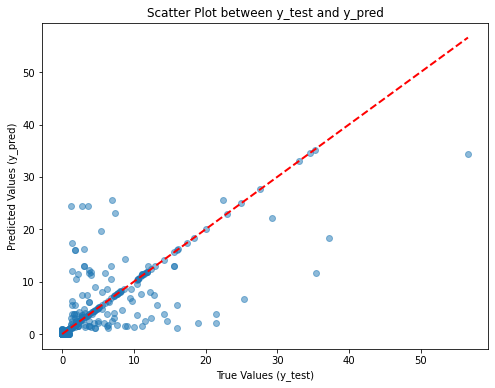

Model: Random Forest Regressor
Mean Squared Error: 7.01
R-squared: 0.65
----------------------------------------


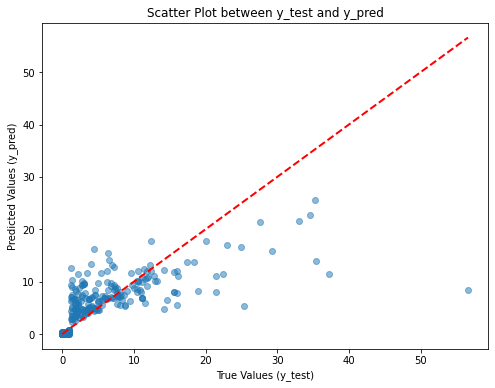

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics



X = df2.drop(columns=['Rainfall'])
y = df2['Rainfall']
features = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


# Step 2: Define a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]
# Step 3: Loop through the models, train, and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Print the results
    
    print(f"Model: {model_name}")
    
    print(f"Mean Squared Error: {mse:.2f}")
    
    print(f"R-squared: {r2:.2f}")
 
    print("-" * 40)
    
    # Initialize a scatter plot
    plt.figure(figsize=(8, 6))
    
    
    # Scatter plot between y_pred and y_test
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Scatter Plot between y_test and y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()
# Show the plot



# Model 4 with feature engineering

Model: Linear Regression
Mean Squared Error: 11.10
R-squared: 0.44
----------------------------------------


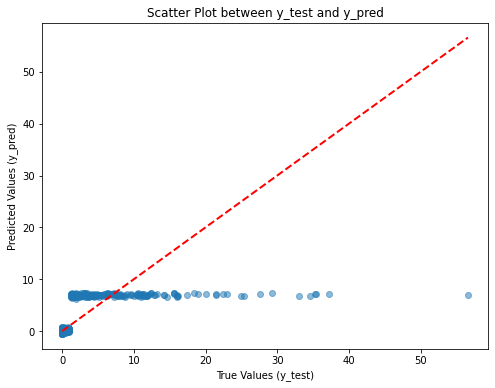

Model: Decision Tree Regressor
Mean Squared Error: 9.56
R-squared: 0.52
----------------------------------------


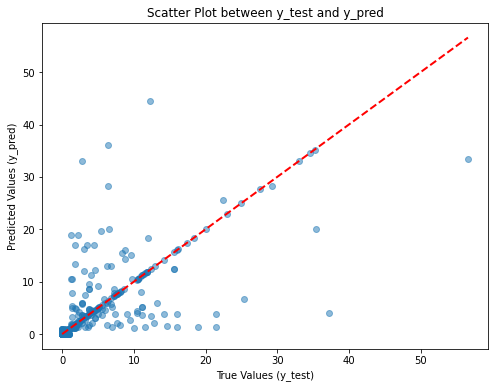

Model: Random Forest Regressor
Mean Squared Error: 6.34
R-squared: 0.68
----------------------------------------


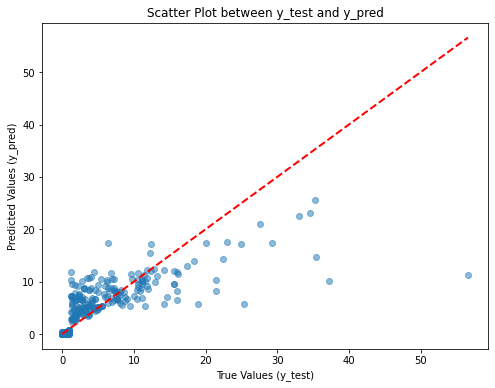

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics



X = df2.drop(columns=['RainTomorrow','Rainfall','WindGustSpeed','WindDir3pm','WindSpeed9am','WindSpeed3pm',
                     'Humidity3pm','Pressure3pm','Temp9am','Temp3pm','Month'])
y = df2['Rainfall']
features = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Step 2: Define a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]
# Step 3: Loop through the models, train, and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Print the results
    
    print(f"Model: {model_name}")
    
    print(f"Mean Squared Error: {mse:.2f}")
    
    print(f"R-squared: {r2:.2f}")
 
    print("-" * 40)
    
    # Initialize a scatter plot
    plt.figure(figsize=(8, 6))
    
    
    # Scatter plot between y_pred and y_test
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Scatter Plot between y_test and y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()
# Show the plot



In [111]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=20)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Calculate performance metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (Best Model):", mse_best)
print("R-squared (Best Model):", r2_best)

Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Score:  7.103072790170709
Mean Squared Error (Best Model): 6.322558602729047
R-squared (Best Model): 0.6805287575886823


The Best Model is using Random Forest Regressor giving least MSE and a higher Rsquared compared to other models. 

## Classifictaion Model for RainTomorrow 

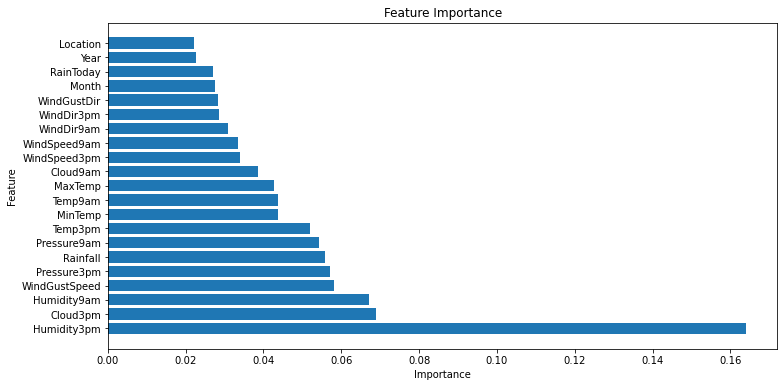

In [114]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to your data
X = df.drop(columns=['RainTomorrow'])  # Assuming 'region' is your target column
y = df['RainTomorrow']
clf.fit(X, y)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Model1

Model: DecisionTree



MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.90      0.89      0.89       923
           1       0.68      0.69      0.68       304

    accuracy                           0.84      1227
   macro avg       0.79      0.79      0.79      1227
weighted avg       0.84      0.84      0.84      1227
 





Confusion Matrix:
[[823 100]
 [ 95 209]]
Train Size: 0.7, Train Score: 1.00, Test Score: 0.84, Status: Overfitting


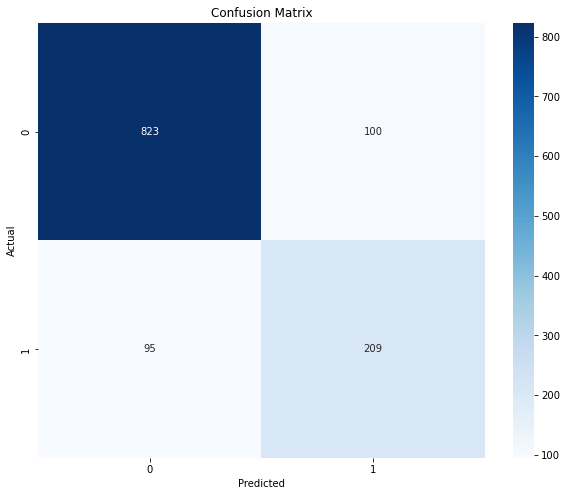

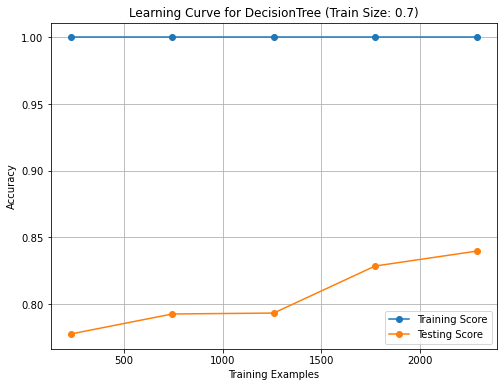

Cross-Validation Scores for DecisionTree: [0.73716381 0.84107579 0.87041565 0.83618582 0.80929095]
Mean CV Score for DecisionTree: 0.8188264058679706





MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.90      0.93      0.92       612
           1       0.77      0.70      0.73       206

    accuracy                           0.87       818
   macro avg       0.84      0.82      0.82       818
weighted avg       0.87      0.87      0.87       818
 





Confusion Matrix:
[[568  44]
 [ 61 145]]
Train Size: 0.8, Train Score: 1.00, Test Score: 0.85, Status: Overfitting


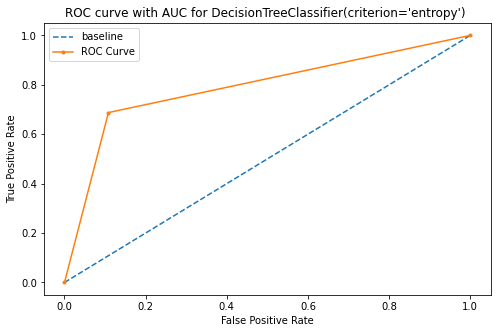

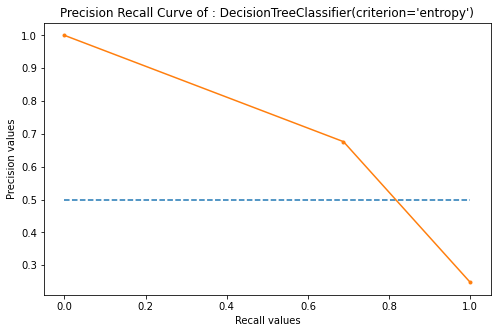

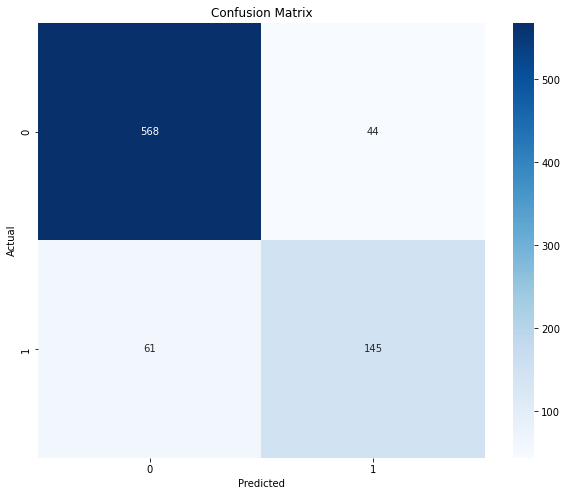

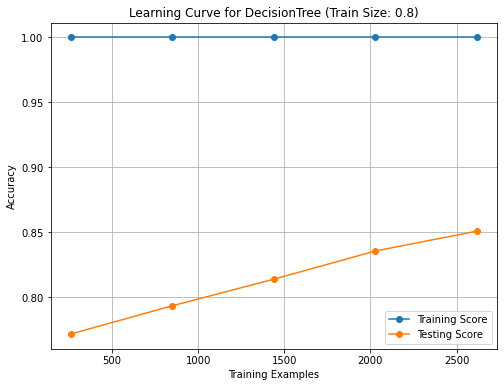

Cross-Validation Scores for DecisionTree: [0.7603912  0.83740831 0.86797066 0.84107579 0.79584352]
Mean CV Score for DecisionTree: 0.8205378973105134


Model: RandomForest



MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.88      0.97      0.92       923
           1       0.86      0.61      0.72       304

    accuracy                           0.88      1227
   macro avg       0.87      0.79      0.82      1227
weighted avg       0.88      0.88      0.87      1227
 





Confusion Matrix:
[[893  30]
 [118 186]]
Train Size: 0.7, Train Score: 1.00, Test Score: 0.88, Status: Overfitting


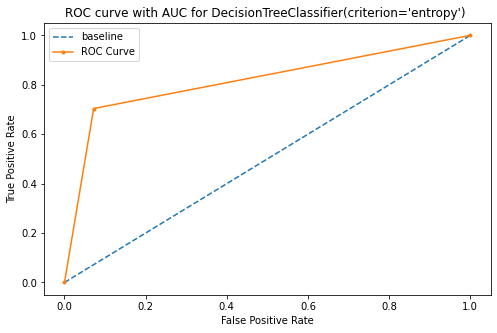

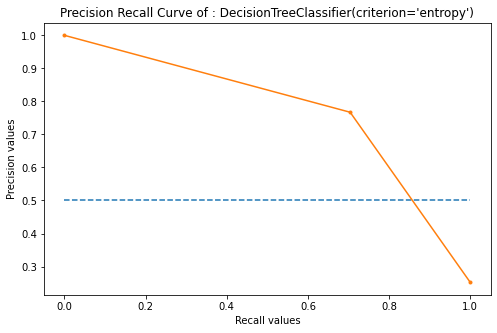

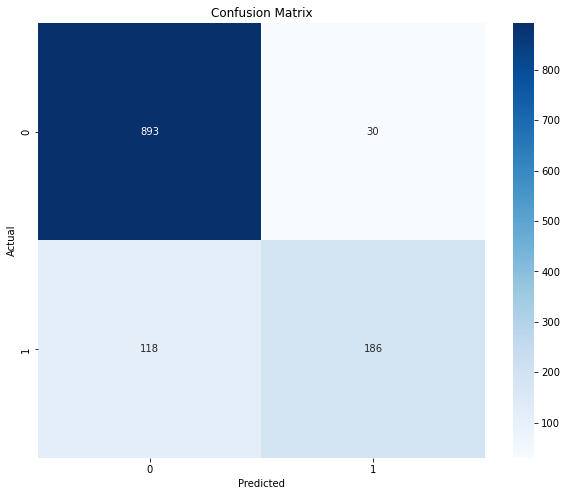

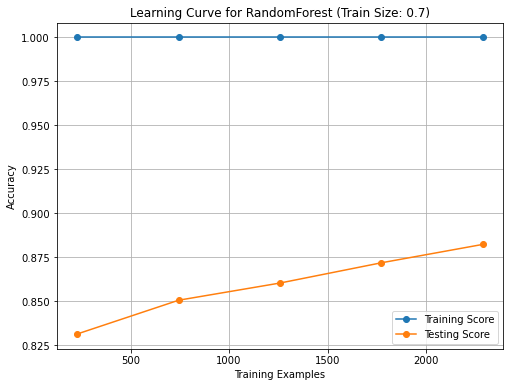

Cross-Validation Scores for RandomForest: [0.82518337 0.81173594 0.87775061 0.88141809 0.84474328]
Mean CV Score for RandomForest: 0.848166259168704





MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.88      0.97      0.92       612
           1       0.87      0.62      0.72       206

    accuracy                           0.88       818
   macro avg       0.88      0.79      0.82       818
weighted avg       0.88      0.88      0.87       818
 





Confusion Matrix:
[[593  19]
 [ 79 127]]
Train Size: 0.8, Train Score: 1.00, Test Score: 0.89, Status: Overfitting


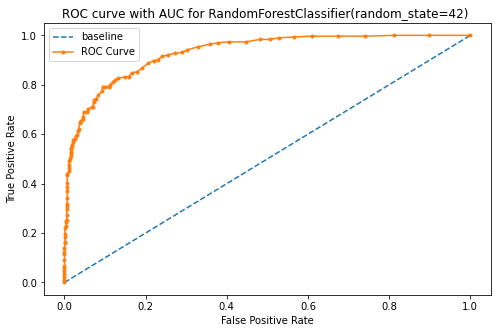

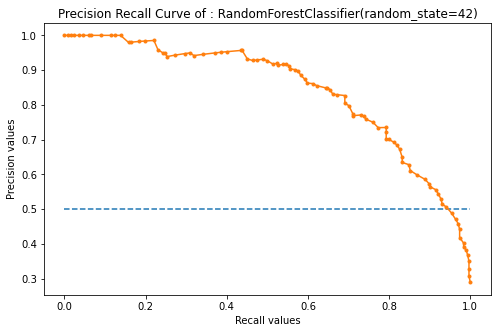

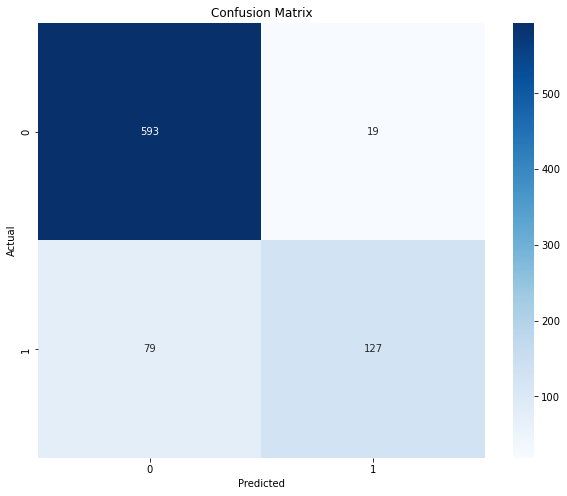

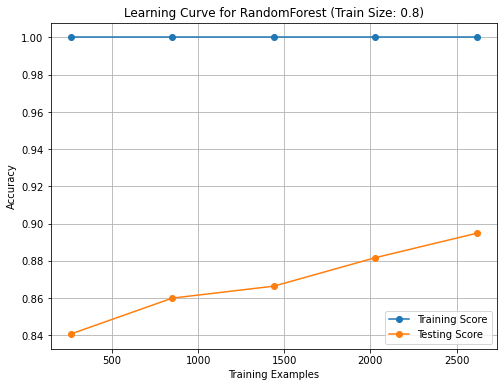

Cross-Validation Scores for RandomForest: [0.82518337 0.81173594 0.87775061 0.88141809 0.84474328]
Mean CV Score for RandomForest: 0.848166259168704


Model: KNeighbors



MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.85      0.90      0.87       923
           1       0.63      0.51      0.56       304

    accuracy                           0.80      1227
   macro avg       0.74      0.70      0.72      1227
weighted avg       0.79      0.80      0.80      1227
 





Confusion Matrix:
[[832  91]
 [150 154]]
Train Size: 0.7, Train Score: 0.92, Test Score: 0.82, Status: Overfitting


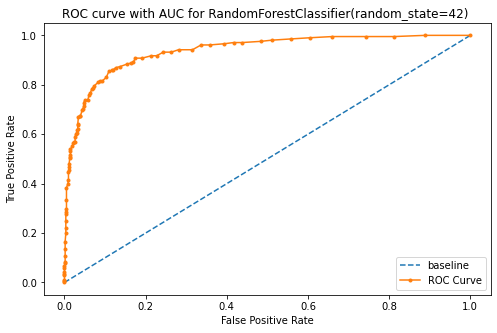

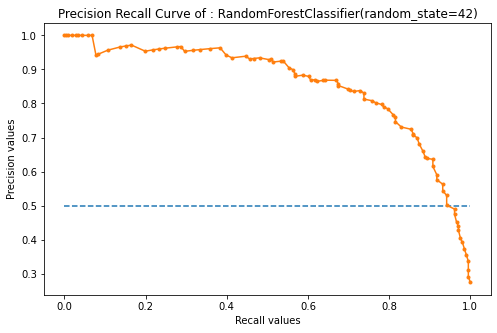

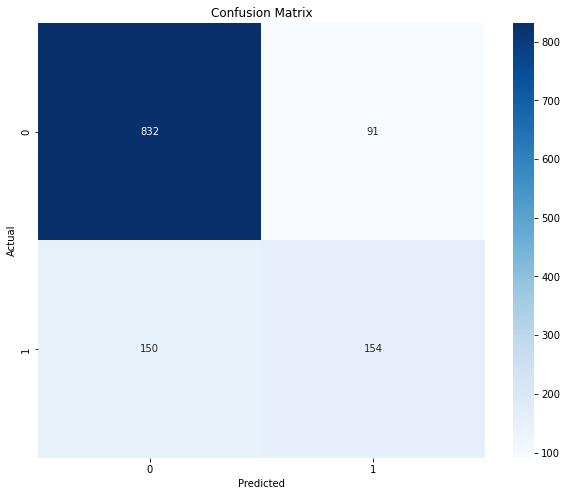

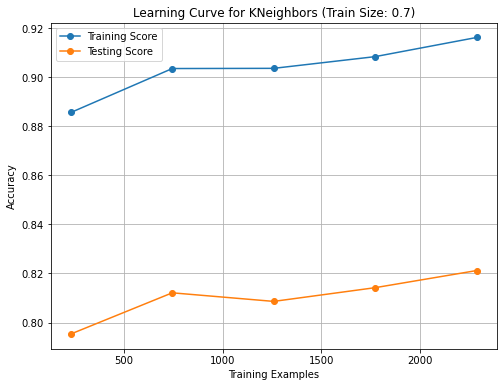

Cross-Validation Scores for KNeighbors: [0.71638142 0.74938875 0.79095355 0.81051345 0.81540342]
Mean CV Score for KNeighbors: 0.7765281173594133





MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.84      0.92      0.87       612
           1       0.65      0.47      0.54       206

    accuracy                           0.80       818
   macro avg       0.74      0.69      0.71       818
weighted avg       0.79      0.80      0.79       818
 





Confusion Matrix:
[[560  52]
 [110  96]]
Train Size: 0.8, Train Score: 0.92, Test Score: 0.83, Status: Overfitting


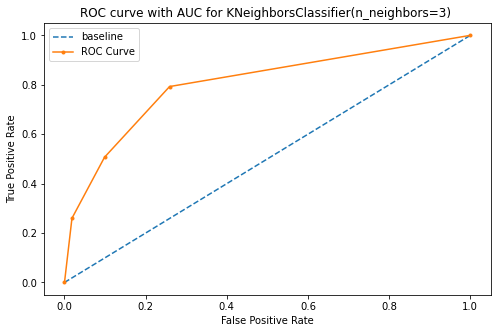

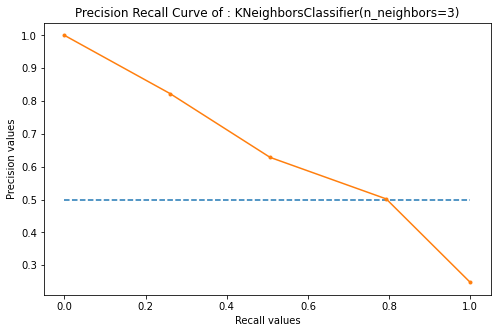

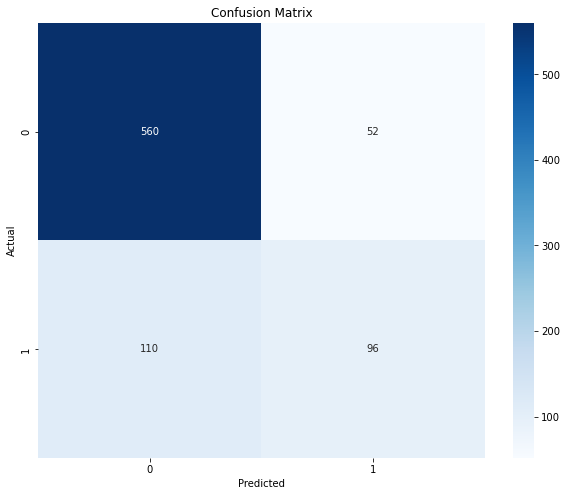

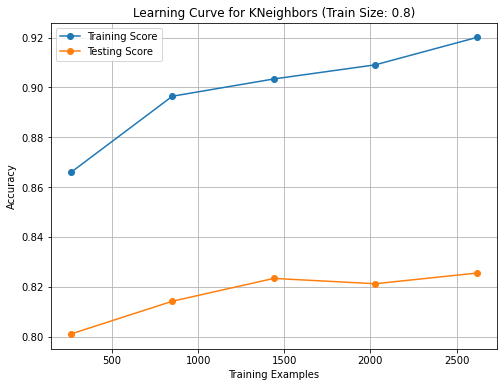

Cross-Validation Scores for KNeighbors: [0.71638142 0.74938875 0.79095355 0.81051345 0.81540342]
Mean CV Score for KNeighbors: 0.7765281173594133


Model: LogisticRegression



MODEL NAME :  LogisticRegression() 




              precision    recall  f1-score   support

           0       0.85      0.94      0.89       923
           1       0.73      0.50      0.59       304

    accuracy                           0.83      1227
   macro avg       0.79      0.72      0.74      1227
weighted avg       0.82      0.83      0.82      1227
 





Confusion Matrix:
[[868  55]
 [152 152]]
Train Size: 0.7, Train Score: 0.85, Test Score: 0.85, Status: Good Fit


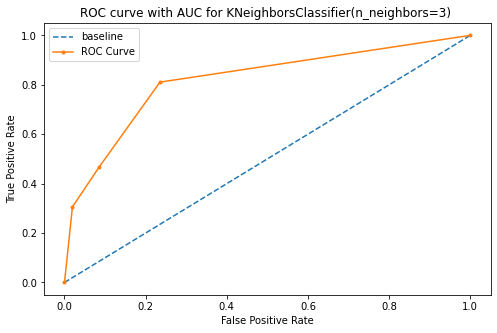

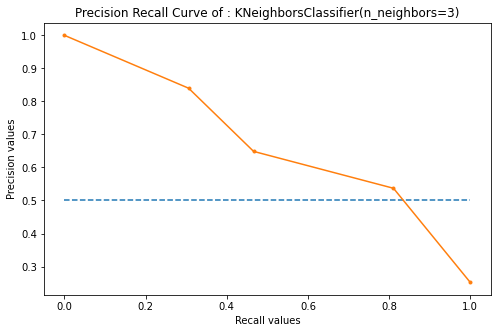

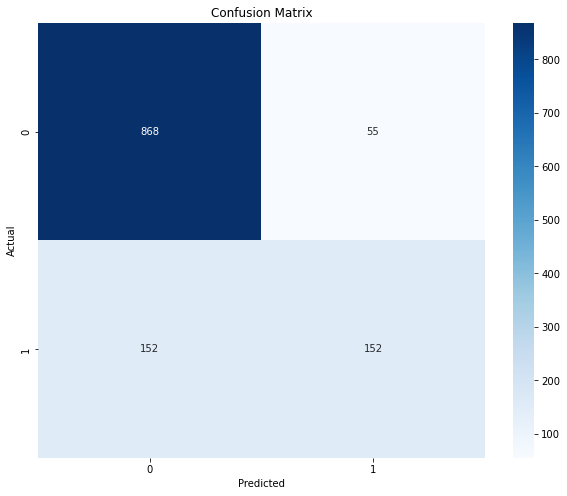

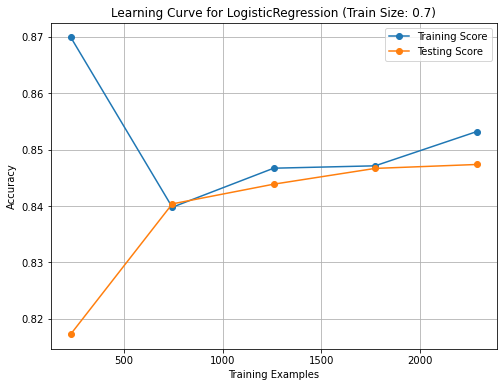

Cross-Validation Scores for LogisticRegression: [0.78117359 0.78606357 0.84107579 0.8398533  0.84596577]
Mean CV Score for LogisticRegression: 0.8188264058679706





MODEL NAME :  LogisticRegression() 




              precision    recall  f1-score   support

           0       0.85      0.94      0.89       612
           1       0.75      0.49      0.59       206

    accuracy                           0.83       818
   macro avg       0.80      0.72      0.74       818
weighted avg       0.82      0.83      0.82       818
 





Confusion Matrix:
[[578  34]
 [105 101]]
Train Size: 0.8, Train Score: 0.85, Test Score: 0.85, Status: Good Fit


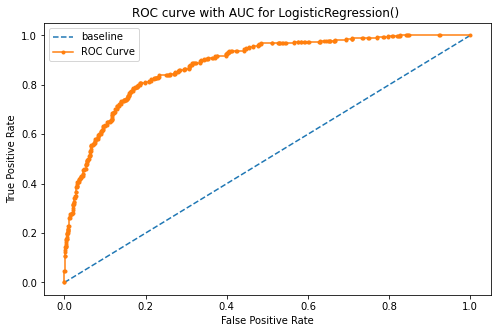

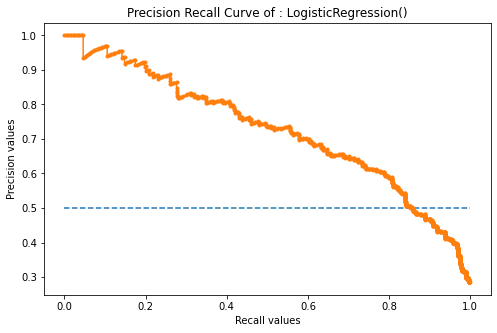

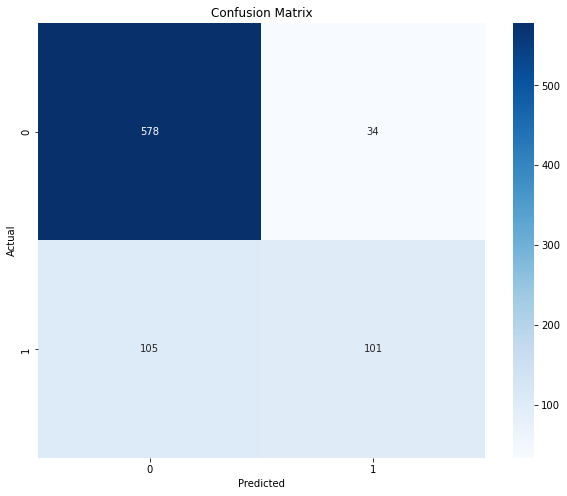

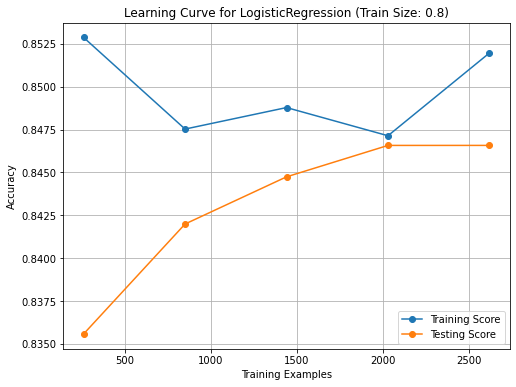

Cross-Validation Scores for LogisticRegression: [0.78117359 0.78606357 0.84107579 0.8398533  0.84596577]
Mean CV Score for LogisticRegression: 0.8188264058679706


Model: Xgboost



MODEL NAME :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 




              precision    recall  f1-score   s

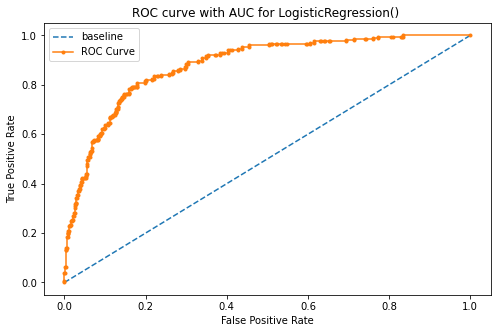

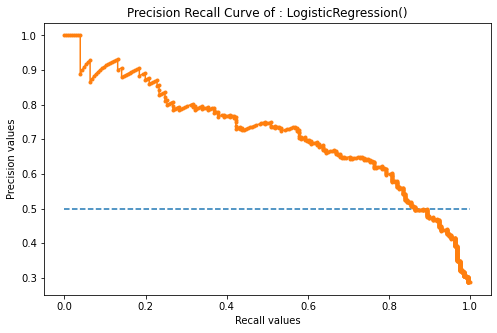

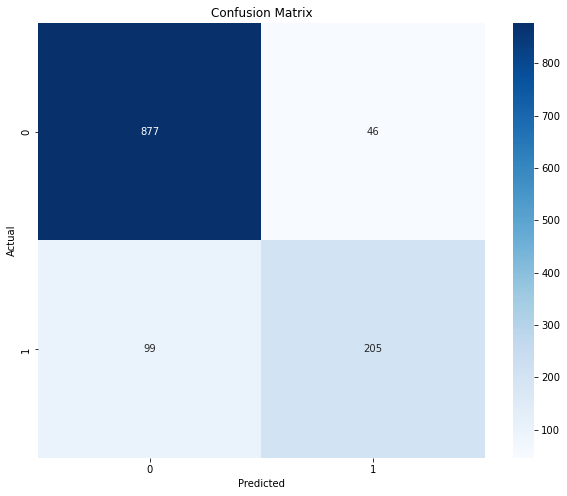

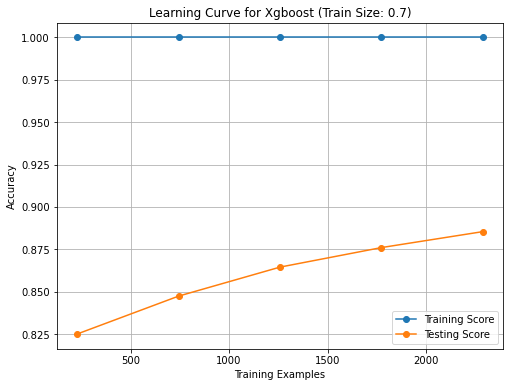

Cross-Validation Scores for Xgboost: [0.77872861 0.80317848 0.76405868 0.82151589 0.85330073]
Mean CV Score for Xgboost: 0.8041564792176039





MODEL NAME :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 




              precision    recall  f1-score   support

           0       0.90      

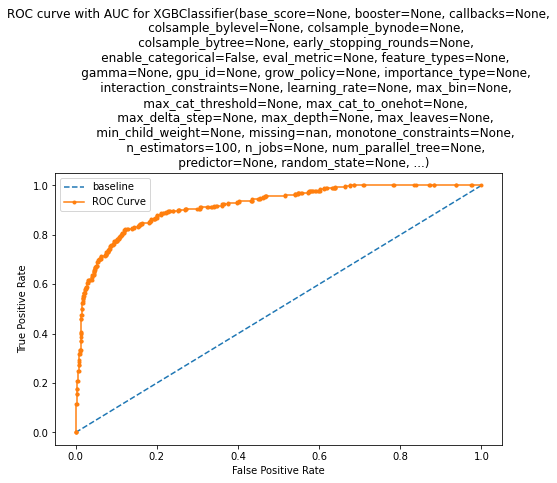

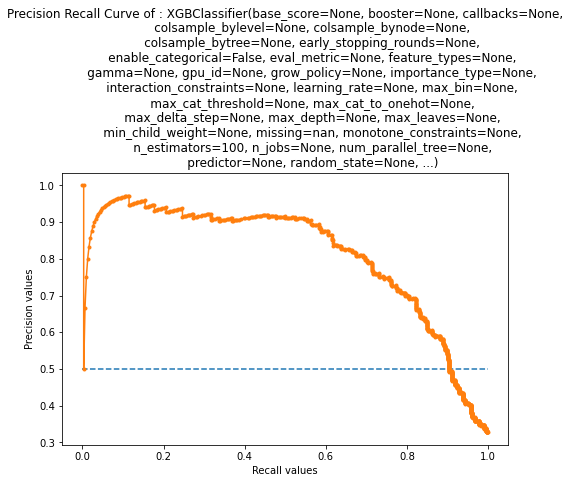

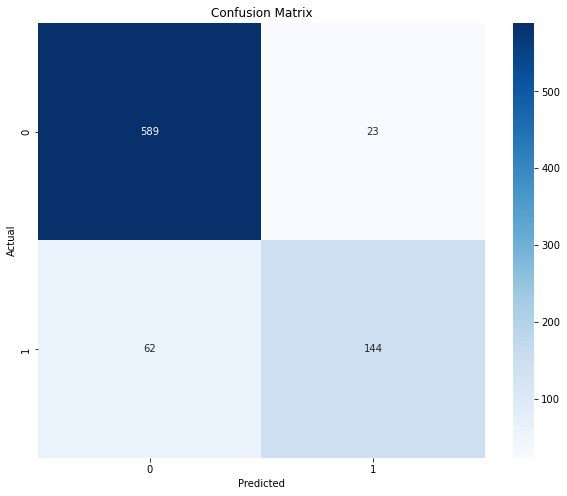

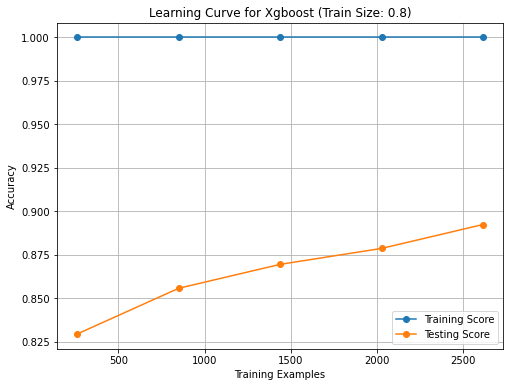

Cross-Validation Scores for Xgboost: [0.77872861 0.80317848 0.76405868 0.82151589 0.85330073]
Mean CV Score for Xgboost: 0.8041564792176039




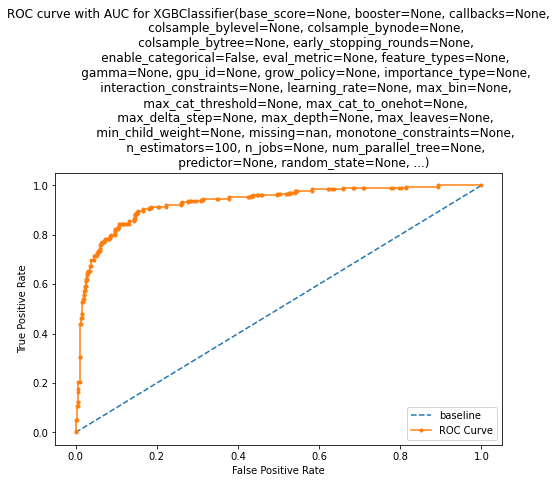

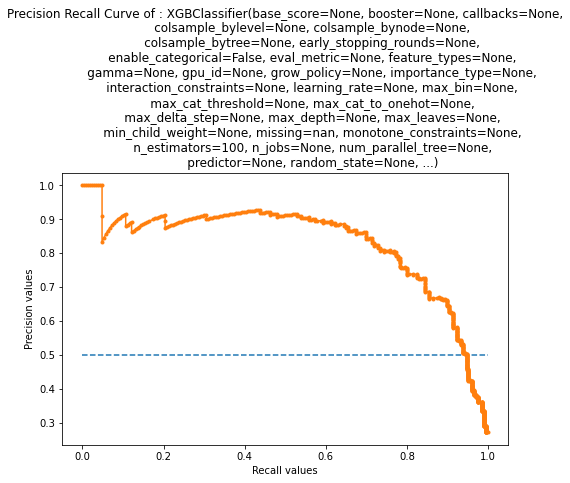

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn import metrics




X = df.drop(columns = ['RainTomorrow']) ## Since, type has the least Feature importance
y = df['RainTomorrow']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a list of models to evaluate
models = [
    ('DecisionTree', DecisionTreeClassifier(criterion='entropy')),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier(n_neighbors=3)),
    ('LogisticRegression',LogisticRegression()), #Logistic Regression
    ('Xgboost',XGBClassifier())
]


model_score = []
acc_list = []
auc_roc=[] 
b_auc=[]
auc_pc=[]
ap=[]
f1=[]

for model_name, model in models:
    print(f"Model: {model_name}")
    train_sizes = [0.7, 0.8]
    
    for train_size in train_sizes: 
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        
        model.fit(X_train,y_train)
    
    
        y_pred = model.predict(X_test)
       
        print("\n\n\nMODEL NAME : ",model,"\n\n\n\n")
    
        print((classification_report(y_test, y_pred)),"\n\n\n")
    
        confusion = confusion_matrix(y_test, y_pred)
        print('\n\nConfusion Matrix:')
        print(confusion)
        
        
    
        model_score.append(model.score(X_train,y_train))
        acc_list.append(accuracy_score(y_test,y_pred))
        
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate mean training and testing scores across folds
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
    
    # Check for overfitting or underfitting
        if abs(train_scores_mean[-1] - test_scores_mean[-1]) < 0.05:
            status = "Good Fit"
        elif train_scores_mean[-1] > test_scores_mean[-1]:
            status = "Overfitting"
        else:
            status = "Underfitting"
    
    # Print the results
        print(f"Train Size: {train_size}, Train Score: {train_scores_mean[-1]:.2f}, Test Score: {test_scores_mean[-1]:.2f}, Status: {status}")
        
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        
    # Plot learning curves
        plt.figure(figsize=(8, 6))
        plt.title(f'Learning Curve for {model_name} (Train Size: {train_size})')
        plt.xlabel('Training Examples')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Score')
        plt.legend(loc='best')
        plt.show()

## Plot ROC AUC Curve    
        baseline_probs = [0 for _ in range(len(y_test))] # generate a baseline prediction (majority class)
        probs = model.predict_proba(X_test) # predict probabilities
        probs = probs[:, 1] # keep probabilities for the positive outcome only
        auc_roc.append(roc_auc_score(y_test, probs)) # calculate scores
        b_auc.append(roc_auc_score(y_test,baseline_probs))
        fpr, tpr, thresholds = roc_curve(y_test, probs) # calculate roc curve
        bl_fpr, bl_tpr, thresholds = roc_curve(y_test, baseline_probs)    
        fig = plt.figure(figsize=(8,5)) # plot the roc curve for the model
        plt.plot(bl_fpr,bl_tpr, linestyle='--',label='baseline')
        plt.plot(fpr, tpr, marker='.',label='ROC Curve')
        plt.title("ROC curve with AUC for {} ".format(model)) # plot title
        plt.xlabel("False Positive Rate") # axis labels
        plt.ylabel("True Positive Rate")
        plt.legend()
        
        
        # predict probabilities
        probs = model.predict_proba(X_test)
        probs = probs[:,1] # keep probabilities for the positive outcome only    
        prediction = model.predict(X_test) # predict class values
        precision, recall,thresholds = precision_recall_curve(y_test, probs)
        auc_pc.append(metrics.auc(recall, precision))
        f1.append(f1_score(y_test, prediction))
        ap.append(average_precision_score(y_test, probs))    
        fig = plt.figure(figsize=(8,5)) # plot the precision-recall curves
        plt.ylabel("Precision values")
        plt.xlabel("Recall values")  
        plt.title("Precision Recall Curve of : %s"%model)
        plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = "baseline")
        plt.plot(recall, precision, marker='.',label="PR curve")

        
        
    
    # Perform cross-validation to get a more robust evaluation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        print(f"Cross-Validation Scores for {model_name}:", cv_scores)
        print(f"Mean CV Score for {model_name}:", np.mean(cv_scores))
        print("\n")    

In [116]:
model_list=['Decision Tree Classifier(0.7)','Decision Tree Classifier(0.8)','Random Forest Classifier(0.7)','Random Forest Classifier(0.8)','KNN Classifier(0.7)','KNN Classifier(0.8)',
           'Logistic Regression(0.7)','Logistic Regression(0.8)','XGBoost Classifier(0.7)','Xgboost Classifier(0.8)']

result = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list, 
                       'roc_auc_score': auc_roc, 'f1-score': f1,'precision-recall AUC': auc_pc, 
                       'average precision score': ap })
result

Model  Model_score  Accuracy  roc_auc_score  \
0  Decision Tree Classifier(0.7)     1.000000  0.841076       0.789579   
1  Decision Tree Classifier(0.8)     1.000000  0.871638       0.815994   
2  Random Forest Classifier(0.7)     1.000000  0.879381       0.930868   
3  Random Forest Classifier(0.8)     1.000000  0.880196       0.938000   
4            KNN Classifier(0.7)     0.922808  0.803586       0.801564   
5            KNN Classifier(0.8)     0.931235  0.801956       0.816502   
6       Logistic Regression(0.7)     0.851904  0.831296       0.880695   
7       Logistic Regression(0.8)     0.850550  0.830073       0.879672   
8        XGBoost Classifier(0.7)     1.000000  0.881826       0.916879   
9        Xgboost Classifier(0.8)     1.000000  0.896088       0.929826   

   f1-score  precision-recall AUC  average precision score  
0  0.681892              0.720650                 0.542433  
1  0.734177              0.772826                 0.614589  
2  0.715385              0.844076                 0.841718  
3  0.721591              0.858591                 0.856358  
4  0.561020              0.655393                 0.563958  
5  0.542373              0.679584                 0.593555  
6  0.594912              0.727191                 0.727877  
7  0.592375              0.714979                 0.716163  
8  0.738739              0.811312                 0.812497  
9  0.772118              0.830046                 0.830900

In [ ]:
# Model2

Model: DecisionTree



MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1372
           1       0.67      0.64      0.65       338

    accuracy                           0.87      1710
   macro avg       0.79      0.78      0.79      1710
weighted avg       0.86      0.87      0.87      1710
 





Confusion Matrix:
[[1268  104]
 [ 123  215]]
Train Size: 0.7, Train Score: 1.00, Test Score: 0.85, Status: Overfitting


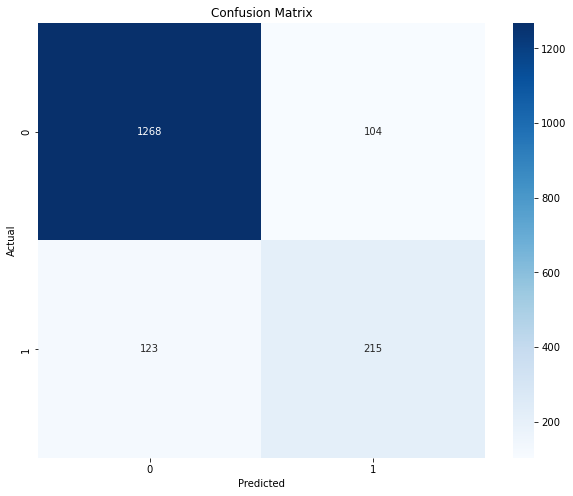

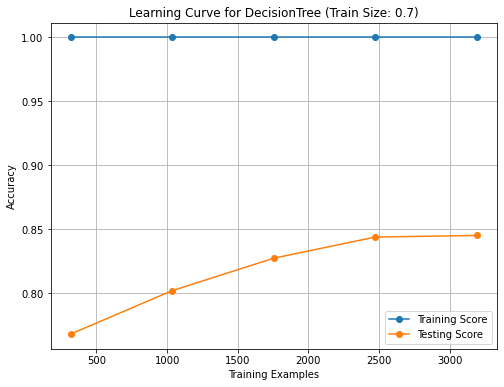

Cross-Validation Scores for DecisionTree: [0.6877193  0.6745614  0.84385965 0.87006146 0.80772608]
Mean CV Score for DecisionTree: 0.7767855767601619





MODEL NAME :  DecisionTreeClassifier(criterion='entropy') 




              precision    recall  f1-score   support

           0       0.92      0.93      0.92       910
           1       0.71      0.67      0.69       230

    accuracy                           0.88      1140
   macro avg       0.81      0.80      0.81      1140
weighted avg       0.88      0.88      0.88      1140
 





Confusion Matrix:
[[846  64]
 [ 75 155]]
Train Size: 0.8, Train Score: 1.00, Test Score: 0.87, Status: Overfitting


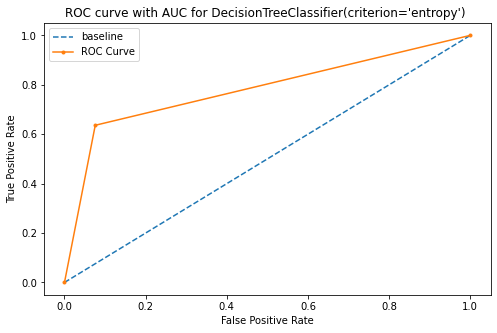

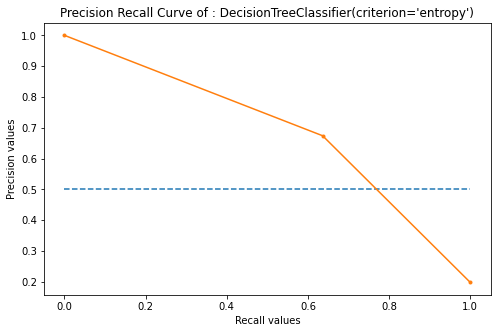

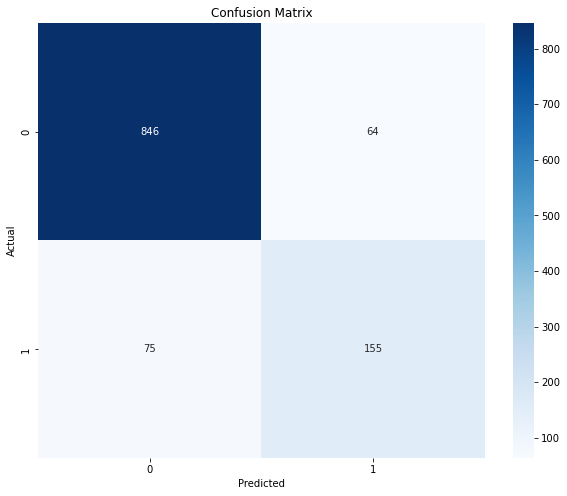

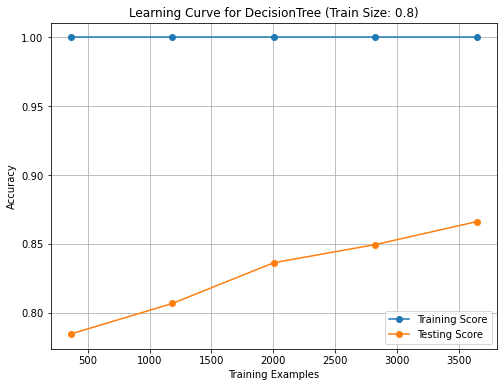

Cross-Validation Scores for DecisionTree: [0.69649123 0.6745614  0.84561404 0.86391572 0.80860404]
Mean CV Score for DecisionTree: 0.7778372841673983


Model: RandomForest



MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1372
           1       0.85      0.60      0.70       338

    accuracy                           0.90      1710
   macro avg       0.88      0.79      0.82      1710
weighted avg       0.90      0.90      0.89      1710
 





Confusion Matrix:
[[1337   35]
 [ 136  202]]
Train Size: 0.7, Train Score: 1.00, Test Score: 0.89, Status: Overfitting


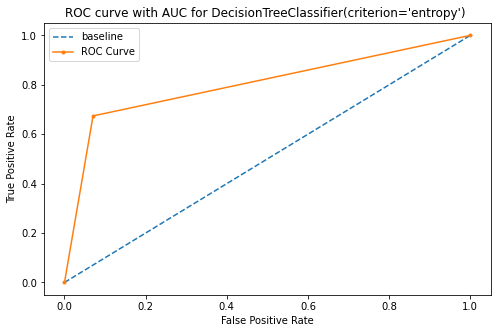

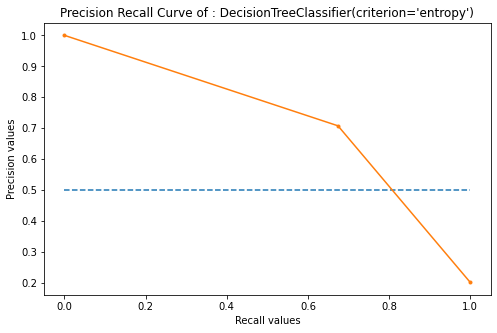

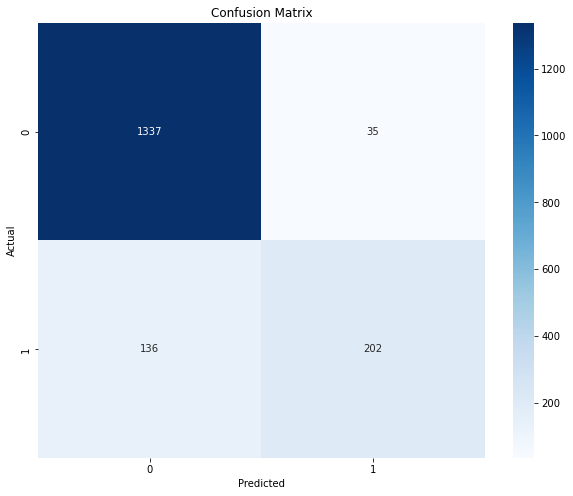

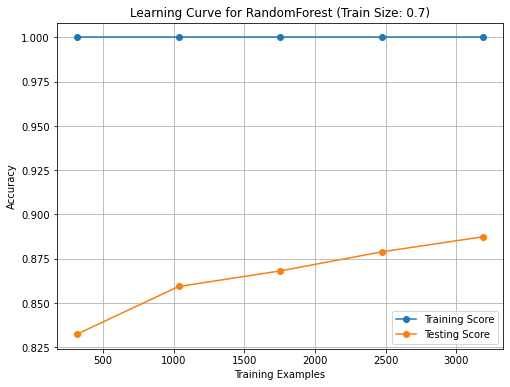

Cross-Validation Scores for RandomForest: [0.84649123 0.70263158 0.93333333 0.90605795 0.84986831]
Mean CV Score for RandomForest: 0.8476764782896662





MODEL NAME :  RandomForestClassifier(random_state=42) 




              precision    recall  f1-score   support

           0       0.91      0.97      0.94       910
           1       0.86      0.63      0.73       230

    accuracy                           0.90      1140
   macro avg       0.89      0.80      0.83      1140
weighted avg       0.90      0.90      0.90      1140
 





Confusion Matrix:
[[887  23]
 [ 86 144]]
Train Size: 0.8, Train Score: 1.00, Test Score: 0.90, Status: Overfitting


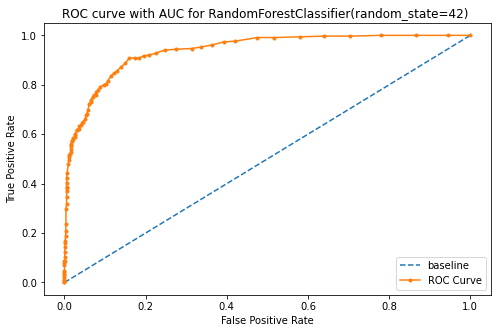

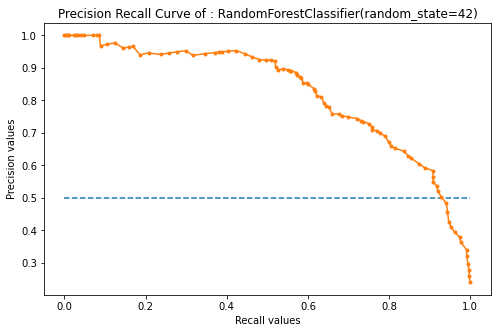

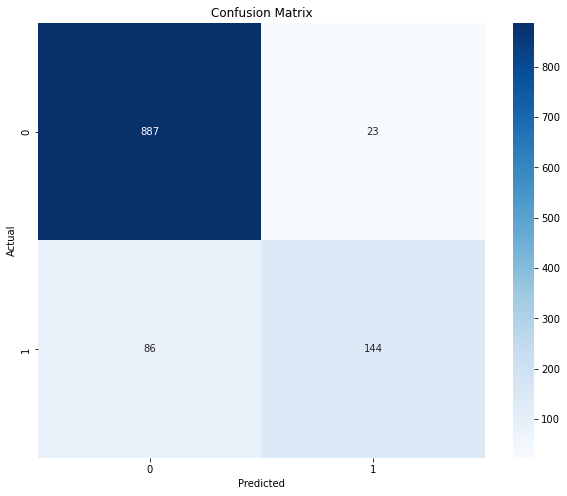

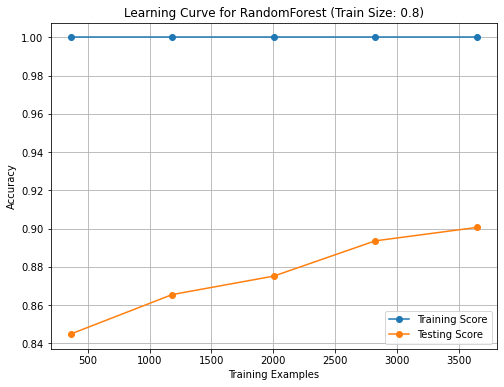

Cross-Validation Scores for RandomForest: [0.84649123 0.70263158 0.93333333 0.90605795 0.84986831]
Mean CV Score for RandomForest: 0.8476764782896662


Model: KNeighbors



MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1372
           1       0.61      0.42      0.50       338

    accuracy                           0.83      1710
   macro avg       0.74      0.68      0.70      1710
weighted avg       0.82      0.83      0.82      1710
 





Confusion Matrix:
[[1281   91]
 [ 195  143]]
Train Size: 0.7, Train Score: 0.92, Test Score: 0.84, Status: Overfitting


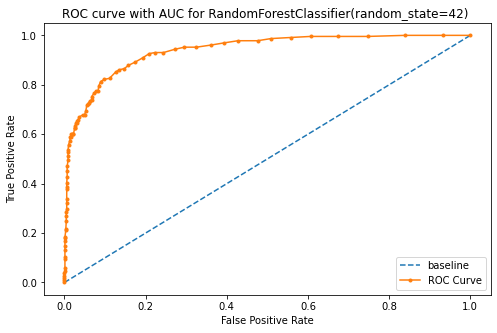

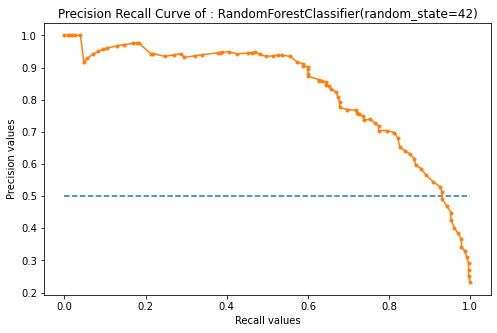

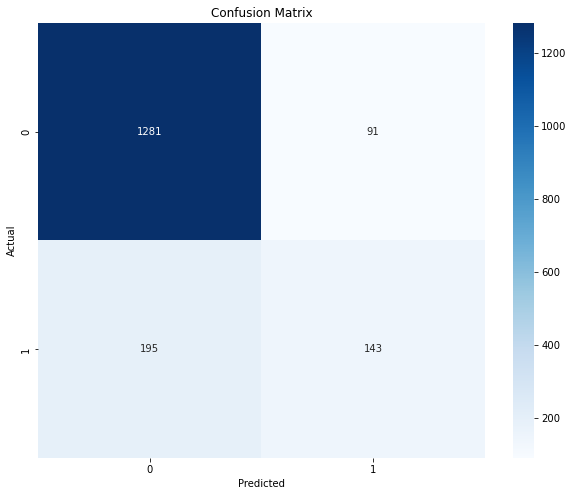

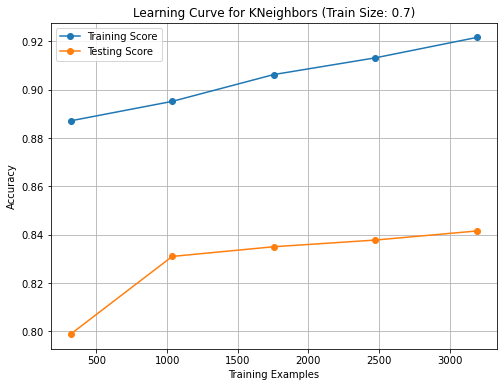

Cross-Validation Scores for KNeighbors: [0.75526316 0.63333333 0.80789474 0.83230904 0.79894644]
Mean CV Score for KNeighbors: 0.765549343067942





MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 




              precision    recall  f1-score   support

           0       0.87      0.93      0.89       910
           1       0.60      0.43      0.50       230

    accuracy                           0.83      1140
   macro avg       0.73      0.68      0.70      1140
weighted avg       0.81      0.83      0.82      1140
 





Confusion Matrix:
[[843  67]
 [131  99]]
Train Size: 0.8, Train Score: 0.93, Test Score: 0.84, Status: Overfitting


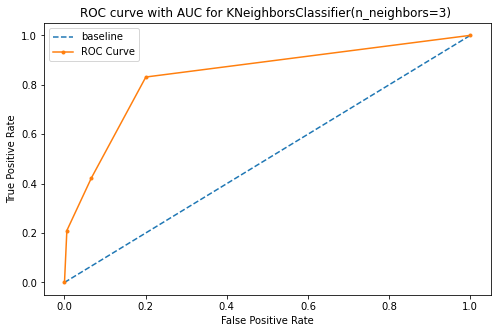

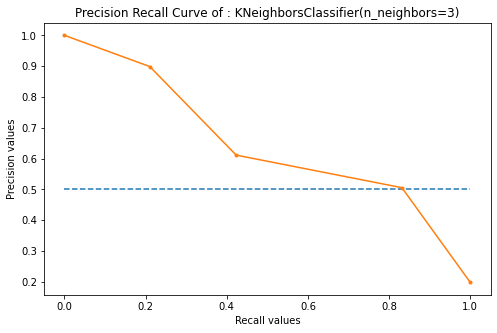

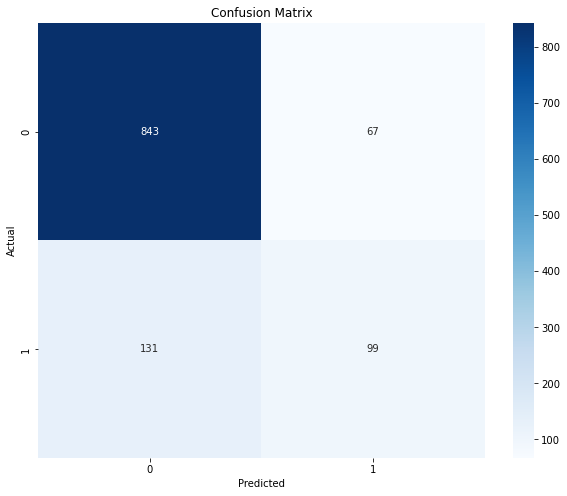

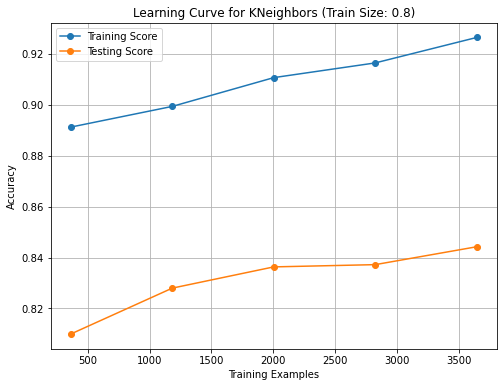

Cross-Validation Scores for KNeighbors: [0.75526316 0.63333333 0.80789474 0.83230904 0.79894644]
Mean CV Score for KNeighbors: 0.765549343067942


Model: LogisticRegression



MODEL NAME :  LogisticRegression() 




              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1372
           1       0.70      0.42      0.53       338

    accuracy                           0.85      1710
   macro avg       0.78      0.69      0.72      1710
weighted avg       0.84      0.85      0.83      1710
 





Confusion Matrix:
[[1310   62]
 [ 195  143]]
Train Size: 0.7, Train Score: 0.85, Test Score: 0.85, Status: Good Fit


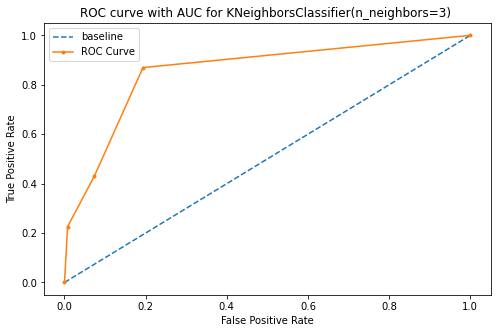

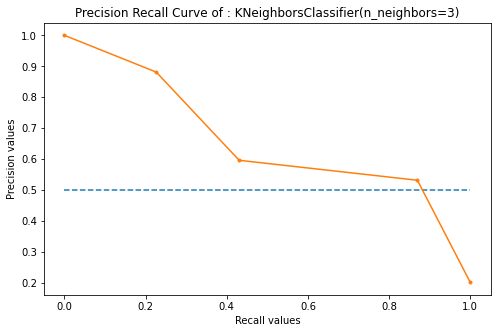

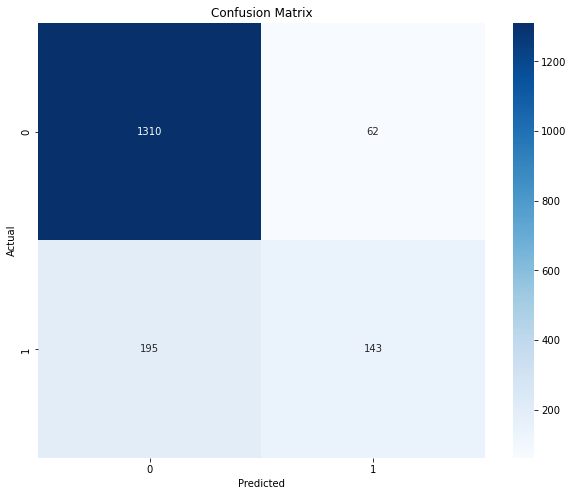

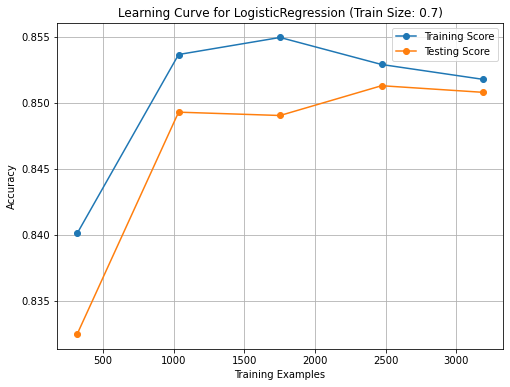

Cross-Validation Scores for LogisticRegression: [0.83684211 0.73596491 0.85701754 0.85338016 0.8595259 ]
Mean CV Score for LogisticRegression: 0.8285461238698151





MODEL NAME :  LogisticRegression() 




              precision    recall  f1-score   support

           0       0.86      0.96      0.91       910
           1       0.69      0.39      0.50       230

    accuracy                           0.84      1140
   macro avg       0.78      0.67      0.70      1140
weighted avg       0.83      0.84      0.82      1140
 





Confusion Matrix:
[[870  40]
 [140  90]]
Train Size: 0.8, Train Score: 0.85, Test Score: 0.85, Status: Good Fit


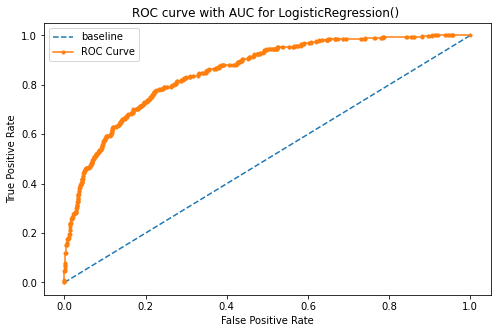

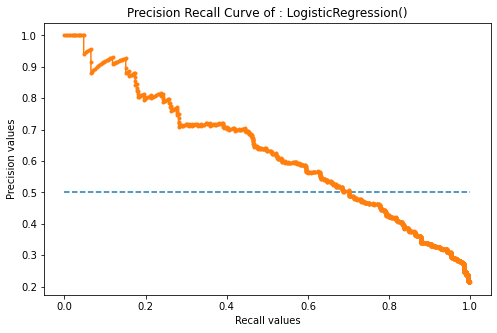

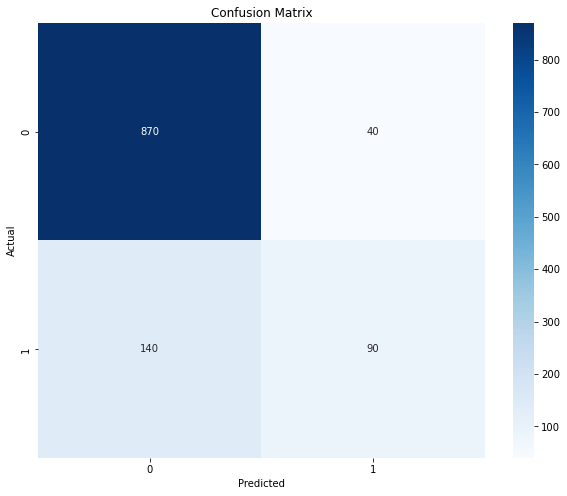

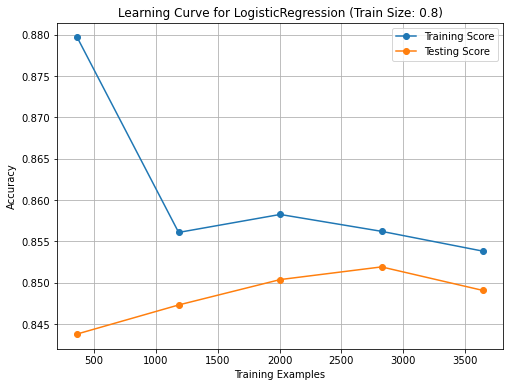

Cross-Validation Scores for LogisticRegression: [0.83684211 0.73596491 0.85701754 0.85338016 0.8595259 ]
Mean CV Score for LogisticRegression: 0.8285461238698151


Model: Xgboost



MODEL NAME :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 




              precision    recall  f1-score   s

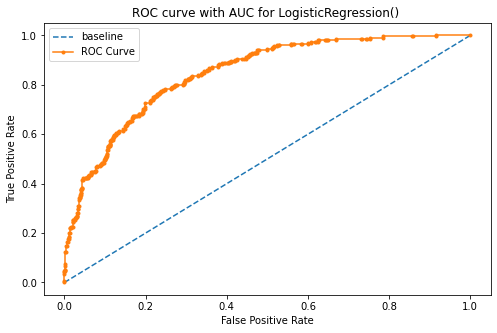

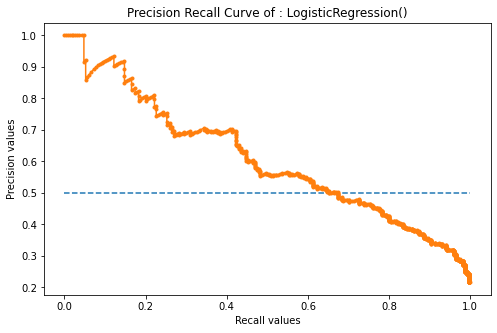

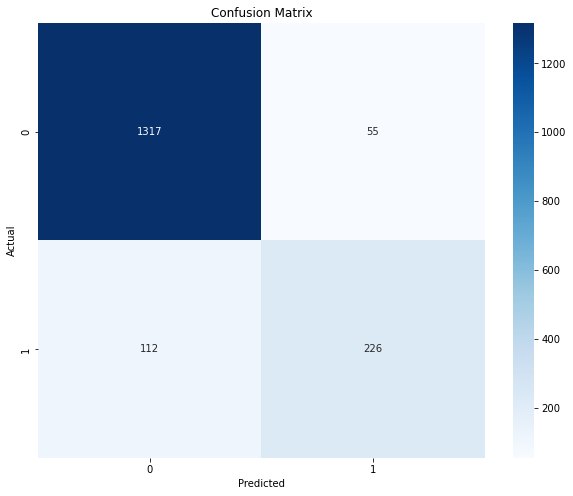

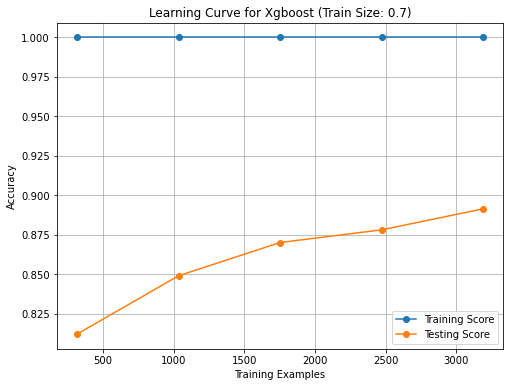

Cross-Validation Scores for Xgboost: [0.78157895 0.66052632 0.84736842 0.89113257 0.84372256]
Mean CV Score for Xgboost: 0.804865764058962





MODEL NAME :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 




              precision    recall  f1-score   support

           0       0.92      0

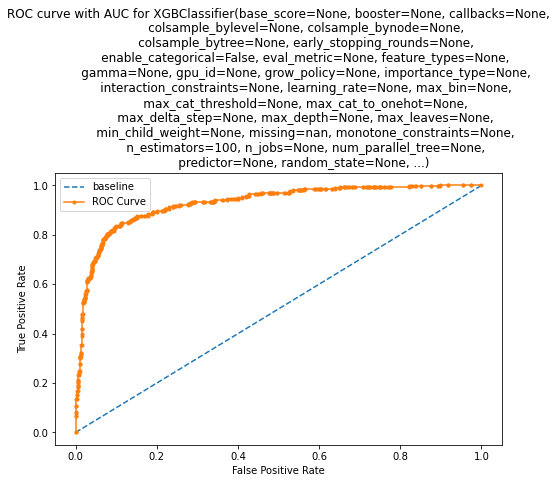

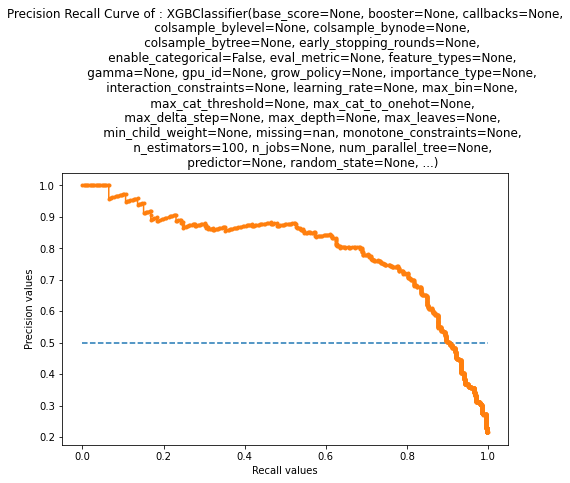

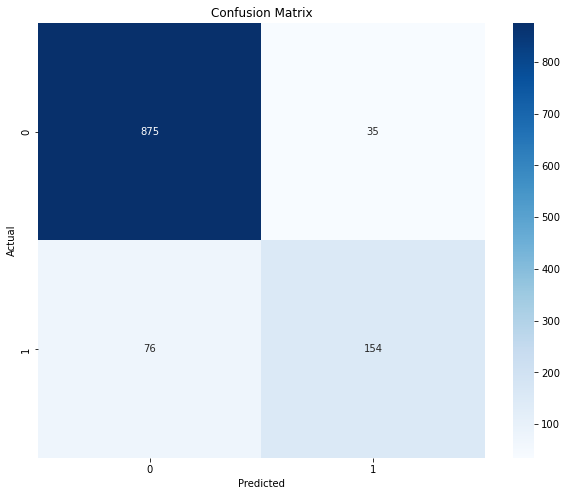

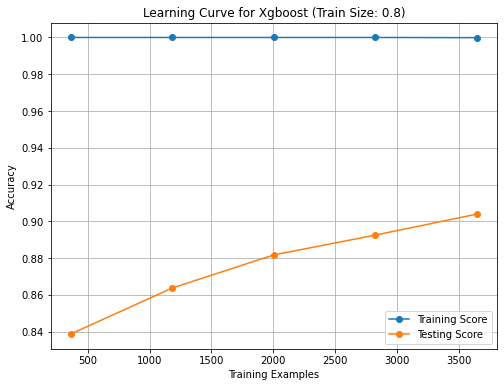

Cross-Validation Scores for Xgboost: [0.78157895 0.66052632 0.84736842 0.89113257 0.84372256]
Mean CV Score for Xgboost: 0.804865764058962




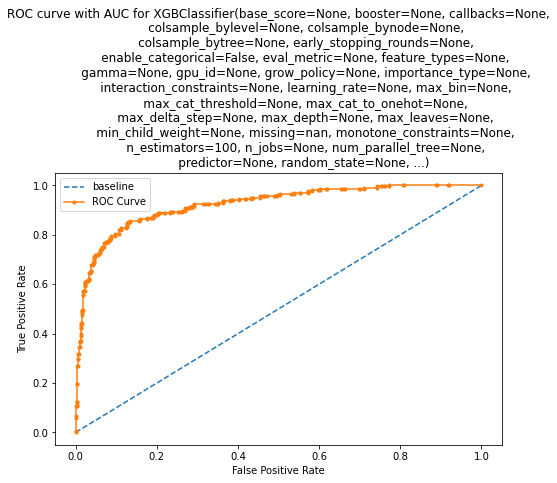

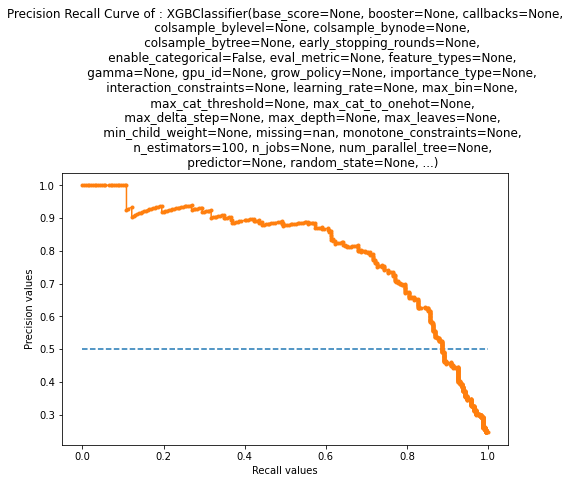

In [117]:
X = df2.drop(columns = ['RainTomorrow']) 
y = df2['RainTomorrow']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a list of models to evaluate
models = [
    ('DecisionTree', DecisionTreeClassifier(criterion='entropy')),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier(n_neighbors=3)),
    ('LogisticRegression',LogisticRegression()), #Logistic Regression
    ('Xgboost',XGBClassifier())
]


model_score = []
acc_list = []
auc_roc=[] 
b_auc=[]
auc_pc=[]
ap=[]
f1=[]

for model_name, model in models:
    print(f"Model: {model_name}")
    train_sizes = [0.7, 0.8]
    
    for train_size in train_sizes: 
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        
        model.fit(X_train,y_train)
    
    
        y_pred = model.predict(X_test)
       
        print("\n\n\nMODEL NAME : ",model,"\n\n\n\n")
    
        print((classification_report(y_test, y_pred)),"\n\n\n")
    
        confusion = confusion_matrix(y_test, y_pred)
        print('\n\nConfusion Matrix:')
        print(confusion)
        
        
    
        model_score.append(model.score(X_train,y_train))
        acc_list.append(accuracy_score(y_test,y_pred))
        
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate mean training and testing scores across folds
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
    
    # Check for overfitting or underfitting
        if abs(train_scores_mean[-1] - test_scores_mean[-1]) < 0.05:
            status = "Good Fit"
        elif train_scores_mean[-1] > test_scores_mean[-1]:
            status = "Overfitting"
        else:
            status = "Underfitting"
    
    # Print the results
        print(f"Train Size: {train_size}, Train Score: {train_scores_mean[-1]:.2f}, Test Score: {test_scores_mean[-1]:.2f}, Status: {status}")
        
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        
    # Plot learning curves
        plt.figure(figsize=(8, 6))
        plt.title(f'Learning Curve for {model_name} (Train Size: {train_size})')
        plt.xlabel('Training Examples')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Score')
        plt.legend(loc='best')
        plt.show()

## Plot ROC AUC Curve    
        baseline_probs = [0 for _ in range(len(y_test))] # generate a baseline prediction (majority class)
        probs = model.predict_proba(X_test) # predict probabilities
        probs = probs[:, 1] # keep probabilities for the positive outcome only
        auc_roc.append(roc_auc_score(y_test, probs)) # calculate scores
        b_auc.append(roc_auc_score(y_test,baseline_probs))
        fpr, tpr, thresholds = roc_curve(y_test, probs) # calculate roc curve
        bl_fpr, bl_tpr, thresholds = roc_curve(y_test, baseline_probs)    
        fig = plt.figure(figsize=(8,5)) # plot the roc curve for the model
        plt.plot(bl_fpr,bl_tpr, linestyle='--',label='baseline')
        plt.plot(fpr, tpr, marker='.',label='ROC Curve')
        plt.title("ROC curve with AUC for {} ".format(model)) # plot title
        plt.xlabel("False Positive Rate") # axis labels
        plt.ylabel("True Positive Rate")
        plt.legend()
        
        
        # predict probabilities
        probs = model.predict_proba(X_test)
        probs = probs[:,1] # keep probabilities for the positive outcome only    
        prediction = model.predict(X_test) # predict class values
        precision, recall,thresholds = precision_recall_curve(y_test, probs)
        auc_pc.append(metrics.auc(recall, precision))
        f1.append(f1_score(y_test, prediction))
        ap.append(average_precision_score(y_test, probs))    
        fig = plt.figure(figsize=(8,5)) # plot the precision-recall curves
        plt.ylabel("Precision values")
        plt.xlabel("Recall values")  
        plt.title("Precision Recall Curve of : %s"%model)
        plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = "baseline")
        plt.plot(recall, precision, marker='.',label="PR curve")

        
        
    
    # Perform cross-validation to get a more robust evaluation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        print(f"Cross-Validation Scores for {model_name}:", cv_scores)
        print(f"Mean CV Score for {model_name}:", np.mean(cv_scores))
        print("\n")    

In [118]:
model_list=['Decision Tree Classifier(0.7)','Decision Tree Classifier(0.8)','Random Forest Classifier(0.7)','Random Forest Classifier(0.8)','KNN Classifier(0.7)','KNN Classifier(0.8)',
           'Logistic Regression(0.7)','Logistic Regression(0.8)','XGBoost Classifier(0.7)','Xgboost Classifier(0.8)']

result = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list, 
                       'roc_auc_score': auc_roc, 'f1-score': f1,'precision-recall AUC': auc_pc, 
                       'average precision score': ap })
result

Model  Model_score  Accuracy  roc_auc_score  \
0  Decision Tree Classifier(0.7)     1.000000  0.867251       0.780146   
1  Decision Tree Classifier(0.8)     1.000000  0.878070       0.801792   
2  Random Forest Classifier(0.7)     1.000000  0.900000       0.939390   
3  Random Forest Classifier(0.8)     1.000000  0.904386       0.939558   
4            KNN Classifier(0.7)     0.929037  0.832749       0.836024   
5            KNN Classifier(0.8)     0.937692  0.826316       0.854360   
6       Logistic Regression(0.7)     0.851555  0.849708       0.852789   
7       Logistic Regression(0.8)     0.854980  0.842105       0.845877   
8        XGBoost Classifier(0.7)     1.000000  0.902339       0.928125   
9        Xgboost Classifier(0.8)     1.000000  0.902632       0.922814   

   f1-score  precision-recall AUC  average precision score  
0  0.654490              0.691003                 0.500646  
1  0.690423              0.723733                 0.542760  
2  0.702609              0.825031                 0.822150  
3  0.725441              0.831886                 0.828973  
4  0.500000              0.647443                 0.558643  
5  0.500000              0.659245                 0.581029  
6  0.526703              0.628919                 0.629701  
7  0.500000              0.608062                 0.609239  
8  0.730210              0.795451                 0.795927  
9  0.735084              0.803802                 0.804362

## Xgboost Classifier gives the best accuracy with 93%